# VibeShare Model Analysis

This notebook provides a comparative analysis of various AI models based on their responses to specific prompts. It evaluates success rates, response characteristics, and the mention of specific AI frameworks, with a particular focus on the Agent Development Kit (ADK).

In [1]:
import json
import os
import sys
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

# Ensure src is in path for imports
sys.path.append(os.path.abspath('src'))
from data_models import FRAMEWORKS_TO_DETECT

# Set pandas display options for better readability in the detailed responses section
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)

# Load data from the results JSON file
results_path = 'vibeshare_results.json'
if not os.path.exists(results_path):
    results_path = '../vibeshare_results.json'

try:
    with open(results_path, 'r') as f:
        data = json.load(f)
    print(f"Loaded {len(data)} results from {results_path}.")
except FileNotFoundError:
    print("vibeshare_results.json not found. Please run analyze_vibeshare.py first.")
    data = []

Loaded 546 results from vibeshare_results.json.


## Framework Master List
The following frameworks are pre-vetted and actively searched for within model responses. This list includes major orchestration libraries and provider-specific SDKs.

In [2]:
print("Master list of frameworks monitored:")
for i, framework in enumerate(sorted(FRAMEWORKS_TO_DETECT), 1):
    print(f"{i:2}. {framework}")

Master list of frameworks monitored:
 1. Auto-GPT
 2. Devin AI
 3. OpenHands
 4. adk
 5. agent development kit
 6. agentkit
 7. autogen
 8. autogpt
 9. controlflow
10. crewai
11. dialogflow
12. gemini api
13. generative ai python sdk
14. genkit
15. google cloud vertex ai sdk
16. google-cloud-aiplatform
17. google-generativeai
18. haystack
19. jason
20. langchain
21. langchain4j
22. langgraph
23. llamaindex
24. manychat
25. microsoft copilot studio
26. openai api
27. openai assistants
28. openai sdk
29. phidata
30. pydantic ai
31. replit
32. semantic kernel
33. smolagents
34. spring ai
35. swarm
36. vertex ai
37. voiceflow


In [3]:
if data:
    df = pd.DataFrame(data)
    df = df[df['success'] == True]
    # Pre-calculate response length and filter for overview
    df['response_length'] = df['response'].apply(lambda x: len(x) if x is not None else 0)
    
    # display(df.head())

## Success Rate by Model
This chart shows the percentage of prompts that resulted in a successful API response for each model. Failures typically indicate authentication issues, quota limits, or model unavailability.

In [4]:
if not df.empty:
    success_counts = df.groupby('model_name')['success'].mean().reset_index()
    success_counts.rename(columns={'success': 'success_rate'}, inplace=True)
    
    display(HTML("<h3>Success Rate by Model</h3>"))
    display(success_counts.sort_values('success_rate', ascending=False).reset_index(drop=True))

,model_name,success_rate
0,anthropic/claude-opus-4-5,1.0
1,anthropic/claude-sonnet-4-5,1.0
2,gemini-cli-podman/adk-python,1.0
3,gemini-cli-podman/base,1.0
4,gemini/gemini-2.5-flash,1.0
5,gemini/gemini-2.5-flash-lite,1.0
6,gemini/gemini-2.5-pro,1.0
7,gemini/gemini-3-flash-preview,1.0
8,gemini/gemini-3-pro-preview,1.0
9,groq/llama-3.3-70b-versatile,1.0


## Response Length Distribution
Analyzes the verbosity of successful responses. Models with higher median lengths may provide more detailed explanations or extensive code samples.

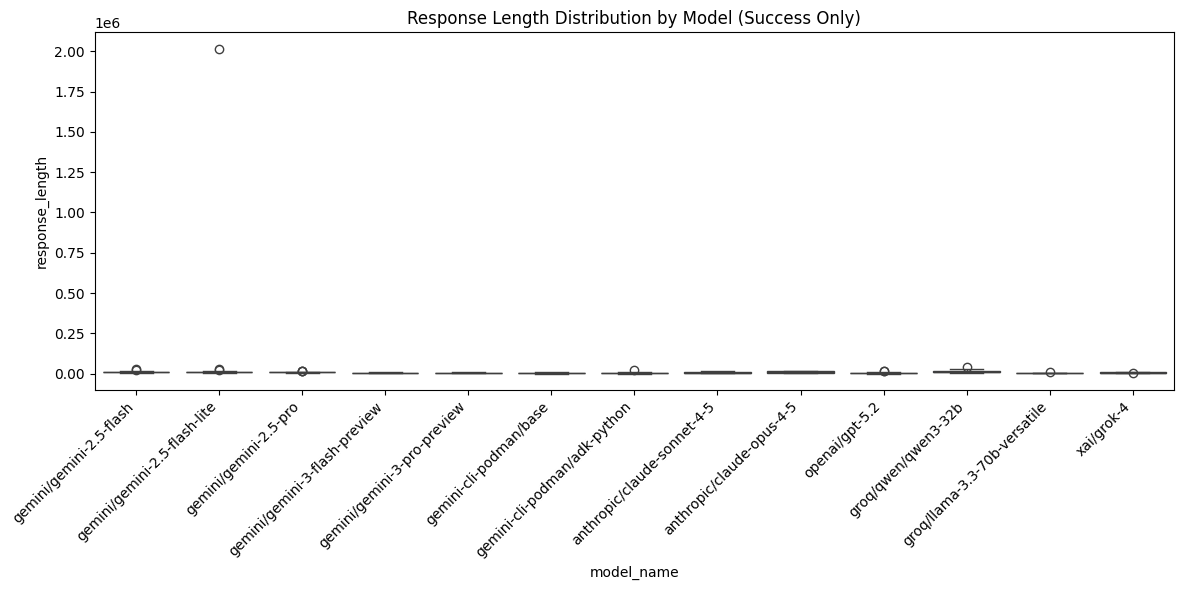

In [5]:
if not df.empty:
    df_success = df[df['success'] == True]
    if not df_success.empty:
        plt.figure(figsize=(12, 6))
        sns.boxplot(data=df_success, x="model_name", y="response_length")
        plt.title("Response Length Distribution by Model (Success Only)")
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()
    else:
        print("No successful runs to visualize response length.")

## ADK Mentions
Specifically tracks how many successful responses mentioned the Agent Development Kit (ADK) or its variants. This is a key metric for awareness analysis.

In [6]:
if not df.empty:
    if 'was_adk_mentioned' in df.columns:
        df_success = df[df['success'] == True]
        adk_ratio = df_success.groupby('model_name')['was_adk_mentioned'].mean().reset_index()
        adk_ratio.rename(columns={'was_adk_mentioned': 'mention_ratio'}, inplace=True)
        
        display(HTML("<h3>Ratio of Responses Mentioning ADK by Model</h3>"))
        display(adk_ratio.sort_values('mention_ratio', ascending=False).reset_index(drop=True))

,model_name,mention_ratio
0,gemini-cli-podman/adk-python,0.735294
1,anthropic/claude-opus-4-5,0.294118
2,openai/gpt-5.2,0.214286
3,anthropic/claude-sonnet-4-5,0.000000
4,gemini-cli-podman/base,0.000000
5,gemini/gemini-2.5-flash,0.000000
6,gemini/gemini-2.5-flash-lite,0.000000
7,gemini/gemini-2.5-pro,0.000000
8,gemini/gemini-3-flash-preview,0.000000
9,gemini/gemini-3-pro-preview,0.000000


## AI Framework Mentions by Model
A broader view of all detected frameworks across successful responses. This reveals which orchestration libraries are currently favored or most prominent in model training data.

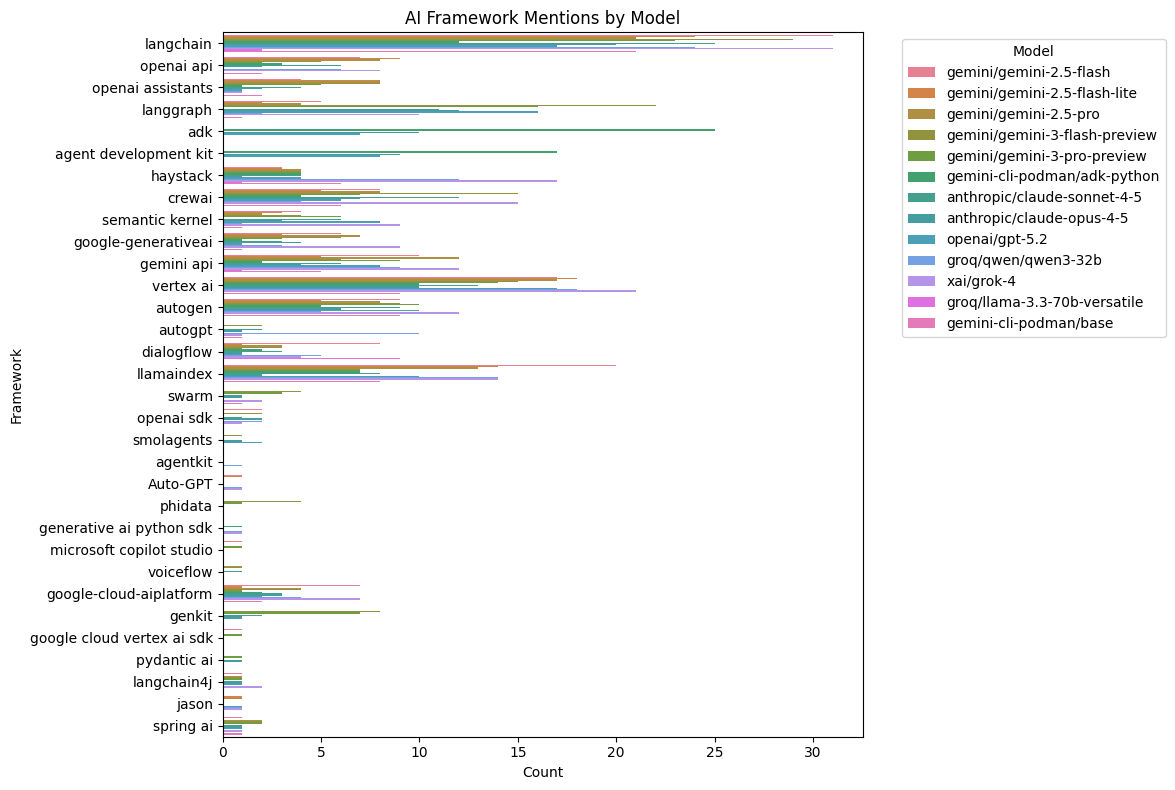

model_name,anthropic/claude-opus-4-5,anthropic/claude-sonnet-4-5,gemini-cli-podman/adk-python,gemini-cli-podman/base,gemini/gemini-2.5-flash,gemini/gemini-2.5-flash-lite,gemini/gemini-2.5-pro,gemini/gemini-3-flash-preview,gemini/gemini-3-pro-preview,groq/llama-3.3-70b-versatile,groq/qwen/qwen3-32b,openai/gpt-5.2,xai/grok-4,Total
mentioned_frameworks,,,,,,,,,,,,,,
langchain,20,25,12,21,31,24,21,29,23,2,24,17,31,280
vertex ai,10,13,10,9,17,18,17,15,14,0,18,17,21,179
llamaindex,2,8,7,8,20,14,13,7,7,0,14,10,14,124
langgraph,12,11,0,1,5,2,4,22,16,0,2,16,10,101
autogen,6,9,5,9,9,5,8,9,10,0,5,10,12,97
crewai,7,12,4,6,8,5,8,15,7,0,4,6,15,97
gemini api,4,6,2,5,10,5,12,6,9,1,9,8,12,89
haystack,1,4,4,6,3,3,4,4,4,1,12,4,17,67
openai api,2,6,3,2,7,9,8,5,2,0,6,0,8,58


In [7]:
if not df.empty and 'mentioned_frameworks' in df.columns:
    df_exploded = df.explode('mentioned_frameworks')
    df_frameworks = df_exploded.dropna(subset=['mentioned_frameworks'])
    
    if not df_frameworks.empty:
        plt.figure(figsize=(12, 8))
        sns.countplot(data=df_frameworks, y='mentioned_frameworks', hue='model_name')
        plt.title('AI Framework Mentions by Model')
        plt.xlabel('Count')
        plt.ylabel('Framework')
        plt.legend(title='Model', bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.tight_layout()
        plt.show()
        
        # Summary Table
        framework_counts = df_frameworks.groupby(['mentioned_frameworks', 'model_name']).size().unstack(fill_value=0)
        # Add a total column for easier analysis
        framework_counts['Total'] = framework_counts.sum(axis=1)
        display(HTML("<h3>AI Framework Mentions Summary Table</h3>"))
        display(framework_counts.sort_values('Total', ascending=False))

## Top 10 Frameworks Response Analysis
Below are the specific responses from each model to the prompt: "List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each."

In [8]:
target_prompt = "List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each."
if not df.empty:
    target_responses = df[df['prompt'] == target_prompt]
    if not target_responses.empty:
        for index, row in target_responses.iterrows():
            display(HTML(f"<h3>Model: {row['model_name']}</h3>"))
            print(row['response'])
            display(HTML("<hr>"))
    else:
        print("No responses found for the target prompt.")

The landscape of generative AI is evolving rapidly, and by 2025, the focus will increasingly be on building sophisticated, reliable, and efficient *agents*. These agents often require more than just a generative model; they need capabilities for planning, memory, tool use, and interaction.

Here are the top 10 Python frameworks poised to be crucial for building generative AI agents in 2025:

1.  **LangChain**
    *   **Description:** Still the undisputed leader for developing applications powered by large language models (LLMs). By 2025, LangChain will have matured significantly, offering even more robust abstractions for agents, chains, retrieval, memory, and callbacks. Its extensive integrations with various LLMs, vector stores, and tools make it the go-to for complex agent orchestration, enabling agents to plan, execute tasks, and learn.
    *   **Why for Agents in 2025:** Its modularity and comprehensive feature set are ideal for creating sophisticated multi-step reasoning agents t

The landscape of AI frameworks is constantly evolving, and predicting the "top 10" for 2025 is inherently speculative. However, based on current trends, the rapid advancements in Large Language Models (LLMs), and the emerging needs for building sophisticated AI agents, here's a list of frameworks that are highly likely to be dominant and influential for generative AI agents in 2025.

**Top 10 Python Frameworks for Building Generative AI Agents in 2025:**

1.  **LangChain:**
    *   **Description:** LangChain has already established itself as a leading framework for developing applications powered by LLMs. It provides a structured way to chain together different LLM calls with other computational resources (like APIs, databases, or other models) to create complex agents. Its strength lies in its modularity, allowing developers to easily build agents capable of reasoning, memory, and tool use. Expect continued evolution with more advanced agentic capabilities.

2.  **LlamaIndex (formerly

Of course. Here is a list of the top 10 Python frameworks for building generative AI agents, with a forecast for their relevance and standing in 2025.

The landscape is shifting from simple prompt-chaining to creating more autonomous, tool-using agents. The best frameworks in 2025 will be those that excel at agentic reasoning, multi-agent collaboration, reliability, and seamless integration with data and external tools.

---

### The Top 10 Python Frameworks for Generative AI Agents in 2025

#### 1. LangChain
The de facto standard and the most comprehensive framework. While it faced criticism for being overly complex, its latest iterations with LangChain Expression Language (LCEL) have made it more modular and intuitive. Its vast ecosystem of integrations makes it an indispensable tool.

*   **Description:** LangChain is an orchestration framework for developing applications powered by large language models (LLMs). It provides a rich set of components for chaining prompts, managing mem

The landscape of AI agents has shifted from simple "chatbots" to autonomous systems capable of reasoning, using tools, and collaborating. In 2025, the focus is on reliability, type safety, and multi-agent orchestration.

Here are the top 10 Python frameworks for building generative AI agents in 2025:

### 1. LangGraph (by LangChain)
LangGraph has become the industry standard for building complex, stateful agents. Unlike the original linear LangChain, LangGraph allows for cyclic graphs, making it perfect for agents that need to loop back, self-correct, and maintain a sophisticated "memory" of the conversation state.

### 2. CrewAI
CrewAI focuses on **role-based multi-agent collaboration**. It allows you to define "crews" of agents (e.g., a Researcher, a Writer, and a Manager) that work together on tasks. Its biggest strength is its intuitive process-driven design, which mimics human team structures.

### 3. Microsoft AutoGen
AutoGen is a high-level framework for building multi-agent sys

Here are the top 10 Python frameworks for building generative AI agents in 2025, ranging from high-level orchestration tools to specialized multi-agent systems.

### 1. LangChain
**The Industry Standard for Orchestration**
LangChain remains the most popular framework for building LLM-powered applications. It provides a modular architecture for connecting language models to external data sources and APIs. Its robust ecosystem includes **LangGraph**, a specialized library for creating stateful, multi-actor applications (agents) with cyclic logic, essential for complex agentic workflows.

### 2. AutoGen (by Microsoft)
**The Leader in Multi-Agent Collaboration**
AutoGen focuses on enabling next-generation LLM applications through multi-agent conversation. It allows developers to define multiple distinct agents (e.g., a "Coder," a "Reviewer," and a "User Proxy") that converse with each other to solve tasks collaboratively. It simplifies error handling, context management, and complex workfl

Here are the top 10 Python frameworks for building generative AI agents in 2025, with brief descriptions:

1.  **LangChain**: A popular framework designed to simplify the creation of applications powered by large language models (LLMs). It provides components and tools for chaining together different LLM calls, handling data, and integrating with various data sources and agents.
2.  **LlamaIndex**: Focuses on making it easy to build LLM-powered applications over custom data. It provides tools for data ingestion, indexing, and retrieval augmented generation (RAG) to enhance LLMs with specific knowledge.
3.  **Hugging Face Transformers**: While not exclusively for agents, it's a foundational library offering thousands of pre-trained models for various tasks, including text generation, summarization, and more, which are crucial building blocks for generative AI agents.
4.  **AutoGen**: A framework that enables the development of LLM applications using multiple agents that can converse wit

Here are 10 prominent Python frameworks for building generative AI agents, as of early 2025:

1.  **LangChain:** A popular open-source framework for developing applications powered by language models. It provides tools, components, and interfaces to chain together LLMs with other sources of data and computation.
2.  **LlamaIndex (formerly GPIndex):** Specializes in data framework for LLM applications. It provides tools for ingesting, structuring, and accessing private or domain-specific data to augment LLMs, making it ideal for RAG (Retrieval Augmented Generation) agents.
3.  **Haystack (deepset):** An end-to-end framework for building custom LLM applications, offering modular components for tasks like RAG, question answering, and document search. It supports various LLMs and databases.
4.  **AutoGen (Microsoft):** A framework that enables the development of LLM applications by orchestrating multiple agents to collaborate on tasks. It simplifies complex workflows and supports human-in-

1. **LangChain**
   - A widely used framework for building LLM-powered applications and agents with tooling, retrieval (RAG), memory patterns, and integrations (vector DBs, tool APIs, observability). Strong ecosystem and community support.

2. **LangGraph (by LangChain)**
   - A graph/state-machine framework for building *reliable, controllable* agents with explicit nodes, edges, and persistence. Especially useful for multi-step, multi-agent workflows, human-in-the-loop, and resumable execution.

3. **OpenAI Agents SDK (Python)**
   - OpenAI’s agent framework for orchestrating tool-using agents with structured outputs, tool/function calling, and guardrail-friendly patterns. Designed to make agent loops, tool execution, and handoffs easier to implement cleanly.

4. **LlamaIndex**
   - A leading framework for data-centric LLM apps: ingestion, indexing, retrieval, and agentic querying over private data. Strong for RAG pipelines, connectors, evaluation utilities, and integrating agents wit

<think>
Okay, the user is asking for the top 10 Python frameworks for building generative AI agents in 2025. Let me start by recalling what generative AI involves. It typically uses models like GANs, VAEs, and transformers, and agents that can interact with environments to learn and generate content. The frameworks need to support model training, inference, and possibly agent-environment interactions.

First, I need to consider existing frameworks and predict which ones might still be top in 2025. Frameworks like PyTorch and TensorFlow are foundational. They might have advanced versions or specialized branches. For example, maybe PyTorch has a newer version with better support for generative models through things like Diffusers.

I should also think about frameworks specifically designed for generative AI. Hugging Face's Transformers library is prominent now; perhaps by 2025 it's even more integrated with other tools for agents. LangChain and LlamaIndex might have evolved for agent-bas

Here's a list of the top 10 Python frameworks for building generative AI agents in 2025, along with brief descriptions:

1. **TensorFlow**: An open-source framework developed by Google, TensorFlow provides tools and libraries for building and training machine learning models, including generative AI agents.
2. **PyTorch**: Another popular open-source framework, PyTorch offers a dynamic computation graph and is particularly well-suited for rapid prototyping and research in generative AI.
3. **Keras**: A high-level neural networks API, Keras provides an easy-to-use interface for building and training deep learning models, including generative AI agents.
4. **Transformers**: Developed by Hugging Face, Transformers is a library that provides pre-trained models and a simple interface for building and fine-tuning generative AI models like language models and image generators.
5. **Stable Diffusion**: A library specifically designed for building stable diffusion models, Stable Diffusion provi

Below is a curated list of the top 10 Python frameworks for building generative AI agents in 2025, based on current trends, adoption rates, and projections from the evolving AI landscape (e.g., advancements in large language models, multi-agent systems, and retrieval-augmented generation). These frameworks focus on enabling the creation of autonomous or semi-autonomous agents that can generate content, reason, and perform tasks. Note that "top" is subjective and influenced by community usage, GitHub stars, and industry reports as of my last knowledge update in 2023—by 2025, this could shift with new releases. I've prioritized those with strong support for generative capabilities like LLMs (e.g., integrating with models from OpenAI, Hugging Face, or Anthropic).

1. **LangChain**  
   A versatile framework for composing chains of LLMs, tools, and agents. It excels in building complex generative agents that can reason, retrieve data, and interact with external APIs, making it ideal for ap

## Detailed Responses by Model and Category
The table below shows full interaction details. Prompts and responses are truncated to 500 characters for concise viewing while maintaining a structured layout.

In [9]:
if not df.empty:
    df_sorted = df.sort_values(by=['model_name', 'category'])
    grouped = df_sorted.groupby(['model_name', 'category'])
    
    for (model, category), group in grouped:
        display(HTML(f"<h3>Model: {model} | Category: {category}</h3>"))
        
        cols = ['prompt', 'response', 'was_adk_mentioned', 'mentioned_frameworks', 'success', 'error_message']
        cols = [c for c in cols if c in group.columns]
        
        display_df = group[cols].copy()
        for col in ['prompt', 'response']:
            if col in display_df.columns:
                display_df[col] = display_df[col].apply(lambda x: (str(x)[:500] + '...') if x and len(str(x)) > 500 else x)

        # Apply style to render newlines in text columns
        text_cols = [c for c in ['prompt', 'response'] if c in display_df.columns]
        if text_cols:
            styler = display_df.style.set_properties(subset=text_cols, **{'white-space': 'pre-wrap', 'text-align': 'left'})
            display(styler)
        else:
            display(display_df)

        display(HTML("<hr>"))

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
8,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.",# AI Customer Support Agent for E-Commerce I'll build a comprehensive customer support agent using **LangGraph** - a modern framework that excels at tool-calling and stateful orchestration. ## Project Structure ``` ecommerce_support_agent/ ├── agent/ │ ├── __init__.py │ ├── graph.py # Main agent graph │ ├── state.py # State definitions │ ├── tools.py # Tool definitions │ ├── nodes.py # Node functions │ └── prompts.py # System prompts ├── ...,False,"['langchain', 'langgraph']",True,None
21,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"# AI Stock Trading Agent with News Sentiment Analysis This comprehensive Python-based AI trading agent uses Google's Gemini models for news sentiment analysis, monitors stock prices in real-time, and executes trades based on intelligent decision-making. ## Project Structure ``` stock_trading_agent/ ├── config/ │ └── settings.py ├── agents/ │ ├── __init__.py │ ├── trading_agent.py │ ├── sentiment_agent.py │ └── risk_manager.py ├── services/ │ ├── __init__.py │ ├── stock_service.p...",False,"['langchain', 'google-generativeai']",True,None
34,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"# Smart Home Energy Optimization Agent I'll design a comprehensive AI agent using **LangGraph** as the high-level agentic framework, combined with a modular architecture for smart home energy optimization. ## System Architecture Overview ``` ┌─────────────────────────────────────────────────────────────────────┐ │ SMART HOME ENERGY AGENT │ ├─────────────────────────────────────────────────────────────────────┤ │ ┌─────────────┐ ┌─────────────┐ ┌─...",False,"['langchain', 'langgraph']",True,None
47,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"# Language Learning Tutor Agent I'll build a conversational AI language tutor using **LangGraph** with native conversation history and persona management. This framework excels at stateful, multi-turn conversations. ## Project Structure ``` language_tutor/ ├── agent/ │ ├── __init__.py │ ├── tutor.py # Main agent logic │ ├── persona.py # Persona management │ ├── tools.py # Language learning tools │ └── memory.py # Conversation memory ├── app.py ...",False,"['langchain', 'langgraph']",True,None
60,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"# AI Email Triage Agent for Executives I'll build an AI email triage agent using **LangGraph** - a library specifically designed for building agentic workflows with cycles, branching, and state management. ## Project Structure ``` email_triage_agent/ ├── pyproject.toml ├── .env.example ├── src/ │ └── email_triage_agent/ │ ├── __init__.py │ ├── main.py │ ├── agent.py │ ├── state.py │ ├── nodes.py │ ├── tools.py │ ├── models.py │ └── config.py └...",False,"['langchain', 'langgraph']",True,None
73,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,# Multi-Agent System: Research & Blog Writing Pipeline ## Framework Choice: **LangGraph** I chose **LangGraph** for this implementation because: 1. **State Management**: LangGraph excels at managing complex state transitions between agents 2. **Graph-Based Workflow**: Natural representation of agent handoffs as a directed graph 3. **Built-in Persistence**

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
99,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","# Multi-Agent Framework Comparison: LangChain vs AutoGen vs Modern Alternatives ## Executive Summary The multi-agent landscape has evolved rapidly. While LangChain and AutoGen pioneered the space, newer frameworks from major AI providers offer more streamlined approaches with better native integration. --- ## 1. LangChain / LangGraph ### Architecture ```python # LangGraph Multi-Agent Example from langgraph.graph import StateGraph, END from langchain_openai import ChatOpenAI from typing impo...",False,"['langgraph', 'vertex ai', 'openai sdk']",True,None
112,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"# CrewAI Delegation and Orchestration: A Comprehensive Comparison ## CrewAI's Core Architecture CrewAI uses a **role-based agent system** with explicit delegation mechanisms. Let me break down how it works and compare it to alternatives. ### CrewAI Delegation Model ```python from crewai import Agent, Task, Crew, Process # CrewAI defines agents with explicit delegation permissions researcher = Agent( role=""Senior Research Analyst"", goal=""Uncover cutting-edge developments in AI"", ...",True,"['autogen', 'semantic kernel', 'adk', 'agent development kit']",True,None
203,"Which Python framework is best for building production-ready agents: LlamaIndex, LangChain, or more specialized kits provided by the model creators themselves?",# Python Frameworks for Production-Ready Agents: A Practical Comparison This is a nuanced question without a universal answer. Let me break down the tradeoffs based on real production considerations. ## Quick Assessment | Factor | LangChain | LlamaIndex | Provider SDKs | |--------|-----------|------------|---------------| | Flexibility | ★★★★★ | ★★★☆☆ | ★★★☆☆ | | RAG/Search | ★★★☆☆ | ★★★★★ | ★★☆☆☆ | | Simplicity | ★★☆☆☆ | ★★★☆☆ | ★★★★★ | | Debugging | ★★☆☆☆ | ★★★☆☆ | ★★★★★ | | Lock-in risk | ...,False,[],True,None
216,Rank the top 5 Python agent frameworks by 'Developer Experience' (DX) and ease of implementing native tool-use.,"# Top 5 Python Agent Frameworks by Developer Experience & Tool-Use Ranked by DX quality and native tool implementation ease: --- ## 1. **LangGraph** ⭐⭐⭐⭐⭐ **DX Score: 9.5/10 | Tool-Use: Excellent** ```python from langgraph.prebuilt import create_react_agent from langchain_core.tools import tool @tool def search(query: str) -> str: """"""Search the web."""""" return f""Results for: {query}"" agent = create_react_agent(model, [search]) agent.invoke({""messages"": [(""user"", ""Search for AI news...",False,"['langgraph', 'crewai', 'smolagents', 'openai sdk']",True,None
229,List and rank 3 high-level frameworks released in the last year that simplify complex multi-agent orchestration like loops and parallel execution.,"# Top 3 Multi-Agent Orchestration Frameworks (2024) Based on recent releases and their capabilities for handling complex orchestration patterns: ## 1. **LangGraph** (LangChain) **Release: Late 2023, major updates 2024** | Strengths | Orchestration Features | |-----------|----------------------| | Graph-based state management | Native cyclic graphs (loops) | | Production-ready | Conditional branching | | Strong ecosystem | Parallel node execution | | Persistence & checkpointing | Human-in-the-...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'swarm']",True,None


,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
242,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","# Key Benefits of Google's Recommended Python SDKs for AI Agents When building AI agents, Google's official SDKs offer several distinct advantages over generic third-party frameworks. Here's a comprehensive analysis: ## 1. **Direct API Integration & Optimization** ```python # Google's official SDK - optimized for their infrastructure from google import genai client = genai.Client() # Direct access to latest features with minimal latency response = client.models.generate_content( model=""...",True,"['langchain', 'adk', 'agent development kit', 'vertex ai']",True,None
255,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Yes, Google provides **ADK (Agent Development Kit)**, also known as **Google Agent Development Kit** or sometimes referred to as **google-adk**. ## Key Details: - **Purpose**: A framework specifically designed for building autonomous AI agents, not just basic LLM interactions - **Features**: - Multi-agent orchestration - Tool integration - Memory/state management - Built-in support for agent loops and reasoning ## Installation: ```bash pip install google-adk ``` ## Basic Example: ```...",True,"['adk', 'agent development kit', 'vertex ai', 'google-generativeai', 'google-cloud-aiplatform']",True,None
268,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"# Google SDKs for Agentic Workflows with Tool Use ## Best Option: **Genkit** Google's **Genkit** is specifically designed for building agentic AI applications with tool use and complex reasoning workflows. ```typescript // Genkit example with tool use import { genkit, z } from 'genkit'; import { googleAI, gemini20Flash } from '@genkit-ai/googleai'; const ai = genkit({ plugins: [googleAI()], model: gemini20Flash, }); // Define a tool const weatherTool = ai.defineTool( { name: 'getW...",False,"['langchain', 'genkit', 'langgraph', 'vertex ai']",True,None
281,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"# Building a Simple Agent with Google's ADK (Agent Development Kit) Google's newest framework for agent development is the **Agent Development Kit (ADK)**, released in April 2025. Here's how to build a simple agent: ## Installation ```bash pip install google-adk ``` ## Simple Agent Example ```python """"""Simple Agent using Google ADK"""""" from google.adk.agents import Agent from google.adk.tools import FunctionTool # Define tools the agent can use def get_weather(city: str) -> str: """"""Ge...",True,"['adk', 'agent development kit', 'vertex ai']",True,None
294,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"# Vertex AI Agent Builder vs. Google's ADK (Agent Development Kit) ## Overview Google now offers two distinct approaches for building AI agents: | Aspect | Vertex AI Agent Builder | Agent Development Kit (ADK) | |--------|------------------------|----------------------------| | **Type** | No-code/low-code platform | Python framework | | **Released** | 2023 (evolved from Dialogflow CX) | March 2025 | | **Target User** | Business users, rapid prototyping | Developers, researchers | | **Control ...",True,"['adk', 'agent development kit', 'dialogflow']",True,None
307,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","# Google's Newest Gen AI SDK: The **Google Gen AI SDK** Google's latest offering is the **Google Gen AI SDK** (package name: `google-genai`), which 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
437,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"# Best TypeScript/JavaScript Frameworks for AI Agents in 2025 ## Top-Tier Frameworks ### 1. **LangChain.js** The most mature and widely-adopted option. ```typescript import { ChatOpenAI } from ""@langchain/openai""; import { AgentExecutor, createOpenAIFunctionsAgent } from ""langchain/agents""; import { pull } from ""langchain/hub""; const llm = new ChatOpenAI({ modelName: ""gpt-4o"" }); const prompt = await pull(""hwchase17/openai-functions-agent""); const agent = await createOpenAIFunctionsAgent({ ...",False,"['langchain', 'autogpt', 'crewai', 'llamaindex', 'openai assistants']",True,None
476,List the top libraries for building LLM agents in Go (Golang).,"# Top Libraries for Building LLM Agents in Go (Golang) Here are the most notable libraries for building LLM agents in Go: --- ## 1. **LangChainGo** The Go port of the popular LangChain framework. ```go go get github.com/tmc/langchaingo ``` **Features:** - Chains, agents, and memory support - Multiple LLM providers (OpenAI, Anthropic, Ollama, etc.) - Document loaders and vector stores - Tools and agent executors --- ## 2. **go-openai** Official-style OpenAI API client for Go. ```go go get...",False,"['langchain', 'openai api']",True,None
489,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"# Google Gen AI SDK for Go Yes, **Google does have an official Gen AI SDK for Go** that supports agentic workflows and tool calling. ## The Official SDK **Repository:** `google/genai` (available at github.com/google/genai) ```go import ""google.golang.org/genai"" ``` ## Tool Calling Support The SDK supports function calling/tool use. Here's a basic example: ```go package main import ( ""context"" ""fmt"" ""google.golang.org/genai"" ) func main() { ctx := context.Background() client, _ := g...",False,"['vertex ai', 'gemini api']",True,None
502,Write a Go program that uses Gemini to call a custom function defined as a tool.,"# Go Program Using Gemini with Custom Function Tools This program demonstrates how to use Google's Gemini AI with custom function calling (tools) in Go. ## Prerequisites 1. Install the Google AI Go SDK: ```bash go get github.com/google/generative-ai-go ``` 2. Set your Gemini API key as an environment variable: ```bash export GEMINI_API_KEY=""your-api-key"" ``` ## Complete Program ```go package main import ( ""context"" ""encoding/json"" ""fmt"" ""log"" ""os"" ""github.com/google/generative-ai-g...",False,['gemini api'],True,None
515,What frameworks are available for building AI agents in Java?,"# Java Frameworks for Building AI Agents Java has several frameworks and libraries available for building AI agents, ranging from general-purpose to specialized solutions. ## Popular Frameworks ### 1. **Langchain4j** A Java port of the popular LangChain framework for building LLM-powered applications. ```java // Example: Simple agent with Langchain4j ChatLanguageModel model = OpenAiChatModel.builder() .apiKey(System.getenv(""OPENAI_API_KEY"")) .modelName(""gpt-4"") .build(); Assista...",False,"['langchain', 'semantic kernel', 'spring ai', 'langchain4j']",True,None
528,How can I integrate Google's Generative AI models into a Spring Boot application to create an agent?,"# Integrating Google Generative AI with Spring Boot Here's a comprehensive guide to building an AI agent using Google's Generative AI (Gemini) in a Spring Boot application. ## 1. Project Setup ### Maven Dependencies (`pom.xml`) ```xml <?xml version=""1.0"" encoding=""UTF-8""?> <project xmlns=""http://maven.apache.org/POM/4.0.0"" xmlns:xsi=""http://www.w3.org/2001/XMLSchema-instance"" xsi:schemaLocation=""http://maven.apache.org/POM/4.0.0 http://maven.apache.org/xsd/maven-4...",False,"['vertex ai', 'gemini api']",True,None
541,Compare LangChain4j with Google's official Java client for Gen AI. Which is bette

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
346,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?",# State Management in Complex Agentic Workflows: LangGraph vs Provider-Native Frameworks ## The Core Problem Complex agentic workflows face several state management challenges: - **Conversation history** that grows unboundedly - **Multi-step reasoning** requiring intermediate results - **Parallel execution** with state synchronization - **Error recovery** and checkpoint restoration - **Long-running workflows** spanning multiple sessions ## LangGraph's Approach: Graph-Based State Management L...,False,['openai assistants'],True,None
359,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?",# Building a Local-First RAG Agent: Library Recommendations ## Core Components You'll Need ``` ┌─────────────────────────────────────────────────────────────┐ │ RAG Agent Architecture │ ├─────────────────────────────────────────────────────────────┤ │ [Documents] → [Chunking] → [Embedding] → [Vector Store] │ │ ↓ │ │ [User Query] → [Embedding] → [Retrieval] → [Context] │ │ ...,True,"['langchain', 'llamaindex', 'haystack', 'adk', 'agent development kit']",True,None
372,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","# Tool Calling in AI Agents ## Concept Overview **Tool calling** (also called function calling) is a mechanism that allows AI language models to interact with external systems, APIs, and functions. Instead of just generating text, the AI can: 1. **Recognize** when a user's request requires external data or actions 2. **Select** the appropriate tool from available options 3. **Generate** structured parameters for the tool 4. **Execute** the tool and incorporate results into its response ``` ┌...",False,['langchain'],True,None
385,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","# Human-in-the-Loop (HITL) for AI Agents ## What is Human-in-the-Loop? **Human-in-the-Loop** is a design pattern where AI agents pause execution at critical points to request human approval, guidance, or intervention before proceeding with potentially consequential actions. ``` ┌─────────────────────────────────────────────────────────┐ │ Agent Workflow │ │ │ │ [Plan] → [Decide] → ⏸️ HUMAN CHECK...",True,"['langchain', 'langgraph', 'autogen', 'crewai', 'pydantic ai', 'adk', 'agent development kit']",True,None
398,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","# ReAct Agent Architecture: A Comprehensive Comparison ## What is ReAct? **ReAct (Reasoning + Acting)** is an agent paradigm where the LLM interleaves reasoning traces with actions in a loop. The model ""thinks aloud"" before deciding which tool to call, observes the result, then reasons again. ``` ┌─────────────────────────────────────────────────────────────────┐ │ ReAct Loop Architecture │ ├─────────────────────────────────────────────────────────────...",False,[],True,None
411,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","# Ranking Python Agent Library Support for Key Concepts Based on analysis of modern Python agent libraries (LangChain, LangGraph, CrewAI, AutoGen, PydanticAI, etc.), here's my ranking: ## 1. 🥇 Session-based History (BEST SUPPORTED) **Support Level: Excellent** | Library | Implementation | |---------|----------------| | LangChain | `ConversationBufferMemory`, `ChatMessageHistory` | | LangGraph | Built-in state persistence with checkpointers | | PydanticAI | Native `message_history` para

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
7,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","# AI Customer Support Agent for E-commerce I'll create a modern AI customer support agent using **LangGraph** and **OpenAI**, which provides excellent tool-calling and orchestration capabilities. ## Installation ```bash pip install langgraph langchain-openai langchain-core python-dotenv ``` ## Complete Implementation ```python import os from datetime import datetime, timedelta from typing import TypedDict, Annotated, Literal from langgraph.graph import StateGraph, END from langgraph.prebuil...",False,"['langchain', 'langgraph', 'openai api']",True,None
20,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"# AI Stock Trading Agent with News Sentiment Analysis I'll create a comprehensive stock trading agent that uses Google's Gemini AI for sentiment analysis and integrates with real-time stock data. ```python import os import json import time from datetime import datetime, timedelta from typing import List, Dict, Optional import google.generativeai as genai import yfinance as yf import requests from dataclasses import dataclass from enum import Enum # Configuration GEMINI_API_KEY = os.environ.ge...",False,[],True,None
33,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"# Smart Home Energy Optimization AI Agent I'll design this using **LangGraph**, a high-level agentic framework perfect for building stateful, multi-step AI agents. ## System Architecture ```python from langgraph.graph import StateGraph, END from langchain_openai import ChatOpenAI from langchain_core.messages import HumanMessage, SystemMessage from typing import TypedDict, Annotated, List import operator from datetime import datetime import json # Define the agent state class EnergyAgentState...",False,"['langgraph', 'crewai']",True,None
46,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"# Conversational AI Language Tutor I'll build a personal language tutor using **LangChain** with **OpenAI**, which provides excellent conversation memory management and persona handling. ```python import os from typing import List, Dict from langchain_openai import ChatOpenAI from langchain.memory import ConversationBufferMemory from langchain.prompts import ChatPromptTemplate, MessagesPlaceholder from langchain.schema import SystemMessage, HumanMessage, AIMessage from langchain.chains import ...",False,"['langchain', 'openai api']",True,None
59,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"# AI Email Triage Agent for Executives I'll create an AI agent using **LangGraph**, a library specifically designed for building agentic workflows with state management and decision-making capabilities. ```python # requirements.txt """""" langgraph>=0.0.40 langchain>=0.1.0 langchain-openai>=0.0.5 langchain-community>=0.0.20 python-dotenv>=1.0.0 """""" import os from typing import TypedDict, Annotated, Literal from datetime import datetime import operator from langgraph.graph import StateGraph, END...",False,"['langchain', 'langgraph']",True,None
72,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"# Multi-Agent System: Research & Blog Writing I'll create a multi-agent system using **CrewAI** framework. ## Why CrewAI? - **Purpose-built for multi-agent coll

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
111,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"# CrewAI Agent Delegation vs. Other Frameworks ## CrewAI's Approach CrewAI uses a **hierarchical, role-based system** with explicit delegation patterns: ```python from crewai import Agent, Task, Crew, Process # Define specialized agents researcher = Agent( role='Researcher', goal='Find relevant information', backstory='Expert at gathering data', allow_delegation=True # Key feature ) writer = Agent( role='Writer', goal='Create compelling content', backstory='Skil...",False,"['autogen', 'semantic kernel', 'vertex ai']",True,None
150,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"# Top 15 Python Libraries for LLM Orchestration and Agent Development ## 1. **LangChain** - **Purpose**: Comprehensive framework for building LLM applications - **Key Features**: Chain composition, memory management, agent tools, document loaders, vector store integrations - **Best For**: Complex multi-step LLM workflows, RAG applications, conversational agents - **GitHub**: ~80k+ stars ## 2. **LlamaIndex (formerly GPT Index)** - **Purpose**: Data framework for connecting LLMs with external da...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack', 'swarm']",True,None
163,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","# Top 20 Tools and Frameworks for Building AI Agents in Python ## Tier 1: Enterprise-Grade Frameworks ### 1. **LangChain** - **Type:** Open-source - **Strengths:** Most comprehensive ecosystem, extensive integrations, strong community - **Best for:** Complex multi-step agents, RAG applications, production systems - **Limitations:** Can be overly complex for simple use cases ### 2. **LlamaIndex** - **Type:** Open-source - **Strengths:** Specialized in data indexing and retrieval, excellent RAG...",False,"['langchain', 'autogpt', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack', 'openai assistants']",True,None
176,Compare Google's official generative AI Python SDK with 'LangChain' and newer high-level 'Agent' kits from Google. When should a developer choose one over the other?,"# Google GenAI SDK vs LangChain vs Google Agent Kits ## Quick Comparison Table | Feature | Google GenAI SDK | LangChain | Google Agent Builder/Vertex AI Agents | |---------|------------------|-----------|---------------------------------------| | **Complexity** | Low | Medium-High | Low-Medium | | **Google Integration** | Native, optimized | Via adapters | Native, managed | | **Multi-provider** | No (Google only) | Yes (20+ LLMs) | Limited | | **Learning Curve** | Minimal | Steep | Low-Medium ...",False,"['vertex ai', 'google-generativeai', 'dialogflow']",True,None
189,What are the trade-offs between using a low-code agent builder vs. a code-first Python framework like LangGraph or a provider-native Agent SDK?,"# Trade-offs: Low-Code vs. Code-First vs. Provider-Native Agent Frameworks ## Low-Code Agent Builders *Examples: Flowise, Langflow, Voiceflow, Stack AI* ### Advantages - **Speed to prototype**: Visual workflows get you from idea to demo in minutes - **Non-technical accessibility**: Product managers and domain experts can build - **Built-in integrations**: Pre-configured connectors for common tools - **Lower maintenance burden**: UI-based configuration is easier to update ### Disadvantages - *...",False,"['autogen', 'crewai', 'openai assistants', 'gemini api', 'voiceflow']",True,None
202,"Which Python framework is best for building production-ready agents: LlamaIndex, LangChain, or more specialized kits provided by the model creators themselves?","# Choosing an Agent Framework ## **The Pragmatic Take** For **production agents in 2024**

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
241,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","# Key Benefits of Google's Recommended Python SDKs ## 1. **Native Integration & Optimization** Google's official SDKs (like Vertex AI SDK, Google AI Python SDK) are: - **Purpose-built** for Google's infrastructure and models - **Optimized** for performance with direct API access - **Feature-complete** from day one when new capabilities launch ## 2. **Enterprise-Grade Reliability** ```python # Example: Built-in retry logic and error handling from vertexai.generative_models import GenerativeMo...",False,"['langchain', 'llamaindex', 'vertex ai', 'google-cloud-aiplatform']",True,None
254,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Google does not provide a widely-recognized high-level Python framework specifically designed for building autonomous agents in the same way that frameworks like LangChain, AutoGPT, or CrewAI do. Google offers: - **Vertex AI SDK** - for accessing their AI models and services - **Google AI Python SDK** - for using Gemini and other Google AI models - **Generative AI tools** - various APIs and libraries However, these are primarily SDKs for model access rather than full-fledged agent frameworks w...",False,"['langchain', 'autogpt', 'crewai', 'llamaindex', 'vertex ai']",True,None
267,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"# Best Google SDK for Agentic Workflows with Tool Use ## **Vertex AI SDK for Python** (Recommended) The **Vertex AI SDK** (`google-cloud-aiplatform`) is your best option. It provides: ### Key Features for Agentic Workflows: 1. **Function Calling (Tool Use)** ```python from vertexai.generative_models import ( GenerativeModel, Tool, FunctionDeclaration ) # Define tools get_weather = FunctionDeclaration( name=""get_weather"", description=""Get weather for a location"", para...",False,"['langchain', 'vertex ai', 'google-cloud-aiplatform']",True,None
280,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"# Simple Agent using LangGraph (Google's Preferred Framework) Google recommends **LangGraph** for building agents. Here's a simple example: ```python from typing import TypedDict, Annotated from langgraph.graph import StateGraph, END from langgraph.prebuilt import ToolNode from langchain_google_genai import ChatGoogleGenerativeAI from langchain_core.messages import HumanMessage, SystemMessage import operator # Define the agent state class AgentState(TypedDict): messages: Annotated[list, o...",False,"['langchain', 'langgraph']",True,None
293,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"# Vertex AI Agent Builder vs. Custom Python Framework Google offers two distinct approaches for building AI agents, each suited to different use cases: ## Vertex AI Agent Builder (No-Code/Low-Code) **Best for:** Business users, rapid prototyping, standard use cases **Strengths:** - Visual interface for building agents without coding - Pre-built integrations with Google services (Search, BigQuery, etc.) - Built-in data store connectors and grounding capabilities - Faster time-to-deployment fo...",False,"['langgraph', 'crewai']",True,None
306,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","# Google's Genkit SDK The newest SDK from Google for Gen AI and agents is **Genkit** (previously called Firebase Genkit), which significantly improves the developer experience compared to the standard Vertex 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
436,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"# Best TypeScript/JavaScript Frameworks for AI Agents in 2025 ## **Top Frameworks** ### **1. LangChain.js** - Most popular choice for AI agent development - Extensive integrations with LLMs (OpenAI, Anthropic, etc.) - Built-in tools for RAG, memory, and multi-step reasoning - Strong community and documentation ### **2. Vercel AI SDK** - Modern, streaming-first architecture - Excellent React integration - Built-in UI components for chat interfaces - Great DX with TypeScript support ### **3. A...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'semantic kernel']",True,None
449,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"# Google's Gen AI Agent SDK for Node.js/TypeScript Yes, Google provides **Vertex AI Agent Builder** (formerly Dialogflow CX) with Node.js/TypeScript support, though it's more of a managed service with client libraries rather than a traditional SDK like LangChain. ## Google's Options ### 1. **Vertex AI Agent Builder** - Managed agent development platform - Available via `@google-cloud/discoveryengine` npm package - Focus: Pre-built agents with minimal code ### 2. **Google AI JavaScript SDK** ...",False,"['vertex ai', 'dialogflow']",True,None
462,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"# Building a Simple ReAct Agent with TypeScript I'll show you how to build a ReAct (Reasoning + Acting) agent using **LangChain.js**, one of the most popular agent frameworks. ## Setup ```bash npm init -y npm install langchain @langchain/openai @langchain/core npm install -D typescript @types/node tsx npx tsc --init ``` ## Basic ReAct Agent ```typescript // agent.ts import { ChatOpenAI } from ""@langchain/openai""; import { AgentExecutor, createReactAgent } from ""langchain/agents""; import { p...",False,"['langchain', 'openai api']",True,None
475,List the top libraries for building LLM agents in Go (Golang).,"# Top Libraries for Building LLM Agents in Go Here are the leading Go libraries for building LLM agents and applications: ## 1. **LangChainGo** - **GitHub**: [tmc/langchaingo](https://github.com/tmc/langchaingo) - **Description**: Official Go port of LangChain, the most popular LLM framework - **Features**: Chains, agents, memory, document loaders, vector stores - **Status**: Actively maintained, growing ecosystem ## 2. **Golem** - **GitHub**: [davidroman0O/golem](https://github.com/davidroma...",False,"['langchain', 'genkit', 'gemini api', 'openai api']",True,None
488,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"# Google's Gen AI SDK for Go Yes, **Google does have an official Gen AI SDK for Go** that supports tool calling and agentic workflows. ## Official SDK The **`google-generative-ai-go`** SDK is Google's official library for Go: - GitHub: https://github.com/google/generative-ai-go - Package: `github.com/google/generative-ai-go/genai` ## Key Features ### Tool Calling (Function Calling) The SDK supports **function calling** where you can: - Define tools/functions the model can call - Provide sch...",False,['langchain'],True,None
501,Write a Go program that uses Gemini to call a custom function defined as a tool.,"# Go Program with Gemini Function Calling Here's a complete Go program that demonstrates how to use Google's Gemini API with custom function calling (tools): ```go package main import ( ""context"" ""encoding/json"" ""fmt"" ""log"" ""os"" ""github.com/google/generative-ai-go/genai"" ""google.golang.org/api/option"" ) // WeatherData represents the response from our weather function type WeatherData struct { Location string `json:""location""` Temperature float64 `json:""temperature""` Condition ...",False,['gemini api'],True,None
514,What frameworks are available for building AI agents in 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
345,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","# State Management in Agentic Workflows ## LangGraph's Approach LangGraph treats state management as a **first-class graph problem** with explicit state schemas: ```python from langgraph.graph import StateGraph from typing import TypedDict, Annotated import operator class AgentState(TypedDict): messages: Annotated[list, operator.add] # Append messages context: dict iteration_count: int final_answer: str def researcher(state: AgentState): # Node has full visibility into ...",False,"['vertex ai', 'openai assistants']",True,None
358,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","# Local-First RAG Agent Libraries ## Core RAG Stack **Vector Databases (Local)** - **ChromaDB** - Lightweight, embedded option, great for prototyping - **Qdrant** - Can run locally with Docker, excellent performance - **FAISS** (Meta) - Pure vector search, no server needed - **Lance/LanceDB** - Modern columnar format, built for ML **Embedding Models** - **sentence-transformers** - Run models like `all-MiniLM-L6-v2` locally - **Ollama** - Provides embedding APIs alongside LLMs - **Instructor-X...",False,"['langchain', 'llamaindex', 'haystack', 'vertex ai', 'gemini api']",True,None
371,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","# Tool Calling in AI Agents ## Concept Overview **Tool calling** (also called function calling) is a capability that allows AI agents to interact with external systems, APIs, and functions. Instead of just generating text, the AI can: 1. **Recognize** when it needs external information or actions 2. **Request** specific tools with appropriate parameters 3. **Receive** structured results back 4. **Incorporate** those results into its response This transforms LLMs from pure text generators int...",False,"['langchain', 'openai api']",True,None
384,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","# Human-in-the-Loop (HITL) for AI Agents **Human-in-the-Loop** is a design pattern where AI agents pause execution at critical decision points to request human approval, guidance, or input before proceeding. This ensures safety, accuracy, and alignment with human intentions. ## Common HITL Scenarios - **High-stakes actions**: Deleting data, financial transactions, sending emails - **Uncertainty**: When the AI's confidence is low - **Learning**: Collecting human feedback to improve the agent -...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'vertex ai']",True,None
397,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.",# ReAct Agent Architecture ## Core ReAct Concept **ReAct** (Reasoning + Acting) is a prompting paradigm where agents alternate between: - **Reasoning** (Thought): Internal deliberation about what to do next - **Acting** (Action): Executing tools/functions or providing answers - **Observing** (Observation): Processing results from actions This creates a loop: **Thought → Action → Observation → Thought → ...** ## Architecture Components ``` ┌─────────────────────────────────────────┐ │ ...,False,['openai sdk'],True,None
410,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","# Ranking Python Agent Libraries Support Based on modern Python agent frameworks (LangChain, CrewAI, AutoGen, etc.), here's my ranking: ## 1️⃣ **Session-based History** (Best Supported) **Support Level: Excellent** - Nearly universal acro

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
6,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","Of course. I will now create a customer support agent for an e-commerce store that can handle returns and answer frequently asked questions. I will build this using the Agent Development Kit (ADK), a modern framework available in this project that simplifies AI agent creation. Here is my plan: 1. **Explore the codebase:** I will start by exploring the codebase to understand the project structure and how to best create the agent. 2. **Create Tools:** I'll design two primary tools: one for pro...",True,"['adk', 'agent development kit']",True,None
32,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"Of course. I will start by using the codebase investigator to understand the project's architecture and design an intelligent agent for optimizing smart home energy usage. Excellent. Based on the investigation, here is a design for the Smart Home Energy Agent using the `adk-python` framework. ### **Smart Home Energy Agent: Design Document** #### **1. High-Level Architecture** The system will be a multi-agent system composed of a central **Coordinator Agent** and three specialized sub-agents: ...",True,['adk'],True,None
58,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"Got it. I'll build an email triaging and summarization agent using an agentic workflow library. First, I'll design the core components: * **Tools**: The agent will need tools to `read_email`, `triage_email` (categorize as urgent, important, informational), and `summarize_email`. * **Agent**: The agent will leverage these tools, guided by a prompt that outlines the triage and summarization process. Here is the plan: 1. Initialize a new Python project. 2. Create a file for the agent's tools...",True,['adk'],True,None


,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
110,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"CrewAI and Google's ADK (Agent Development Kit) for Python offer different approaches to agent orchestration and delegation, each with its own strengths. ### CrewAI: Declarative, Role-Based Orchestration CrewAI is designed around the concept of a ""crew"" of agents working together to accomplish a goal. Its approach is more declarative and focuses on defining the roles of the agents and the tasks they need to perform. * **Role-Playing Agents:** You define agents with specific roles, goals, an...",True,"['adk', 'agent development kit']",True,None
123,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.",I cannot directly answer this question as it requires knowledge beyond the scope of the provided tools and project context. My capabilities are limited to interacting with the file system and code within the `/workdir/repos/adk-python` directory.,True,['adk'],True,None
136,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"Here are 10 prominent Python frameworks for building generative AI agents, as of early 2025: 1. **LangChain:** A popular open-source framework for developing applications powered by language models. It provides tools, components, and interfaces to chain together LLMs with other sources of data and computation. 2. **LlamaIndex (formerly GPIndex):** Specializes in data framework for LLM applications. It provides tools for ingesting, structuring, and accessing private or domain-specific data to ...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'haystack']",True,None
149,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"Here's a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development: 1. **LangChain**: A framework for developing applications powered by language models. It enables chaining together different components to build more complex use cases. 2. **LlamaIndex**: A data framework for LLM applications to ingest, structure, and access private or domain-specific data. 3. **CrewAI**: A framework for orchestrating role-playing, autonomous AI agents. 4. **Haystack**: A...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'haystack', 'generative ai python sdk']",True,None
162,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Here are the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs, ranked based on their popularity, features, and flexibility: 1. **LangChain:** An open-source framework for developing applications powered by language models. It provides a modular architecture and a rich set of components for building and customizing agents. 2. **Vertex AI (Google):** A comprehensive platform for building, deploying, and scaling machine learning models ...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'haystack', 'vertex ai', 'dialogflow', 'openai api']",True,None
175,Compare Google's official generative AI Python SDK with 'LangChain' and newer high-level 'Agent' kits from Google. When should a developer choose one over the other?,"Of course. Here is a comparison of Google's generative AI Python SDK, LangChain, and the Google Agent Development Kit (ADK), with guidance on when to choose each. This analysis is based on the contents of the `adk-python` repository you are in and general knowledge of these technologies. ### 1. Google Generative AI Python SDK (`google-generativeai`) This is the foundational, low-level library for direct access to the Gemini family of models. * **What it is:** A client library 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
240,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","Based on the structure and contents of the `adk-python` repository, Google's recommended Python SDK for building AI agents offers several key benefits compared to generic third-party frameworks: 1. **Deep and Native Integration with the Google Ecosystem:** The SDK is not just a wrapper around an API; it's deeply integrated with Google's infrastructure. * **Vertex AI:** There is extensive, built-in support for Vertex AI, including native tools (`VertexAiSearchTool`, `VertexAiRagRetrieval`...",True,"['adk', 'vertex ai']",True,None
253,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Yes, Google provides a high-level Python framework specifically for building autonomous agents called the **Agent Development Kit (ADK)**.",True,"['adk', 'agent development kit']",True,None
266,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"Yes, there is a dedicated kit. Based on the files in your current project, the Google Agent Development Kit (ADK) for Python is best suited for your needs. It's a framework specifically designed for building AI agents that can use tools (function calling) and manage conversation history for long-context reasoning. You can find more information in the `README.md` file located at `/workdir/repos/adk-python/README.md`. The numerous examples in the `/workdir/repos/adk-python/contributing/samples/`...",True,"['adk', 'agent development kit']",True,None
279,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"Of course. Here is a code snippet for a simple agent using the Google Agent Development Kit (ADK). This agent can roll a die and is run using an in-memory runner. ```python # Copyright 2025 Google LLC # # Licensed under the Apache License, Version 2.0 (the ""License""); # you may not use this file except in compliance with the License. # You may obtain a copy of the License at # # http://www.apache.org/licenses/LICENSE-2.0 # # Unless required by applicable law or agreed to in writing, softwar...",True,"['adk', 'agent development kit']",True,None
292,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Google's Vertex AI Agent Builder and the new Agent Development Kit (ADK) for Python represent two distinct approaches to building AI agents, each catering to different needs and use cases. Here’s a comparison to help you choose the right tool for your project. ### **Vertex AI Agent Builder: The Low-Code/No-Code Approach** Vertex AI Agent Builder (formerly Dialogflow) provides a managed, web-based UI for creating conversational AI agents without writing extensive code. * **Target Audience**:...",True,"['adk', 'agent development kit', 'dialogflow']",True,None
305,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","Based on the contents of this repository, the newest library is the **Google Agent Development Kit (ADK)**, which is the project contained in the `repos/adk-python` directory. It improves upon the standard Vertex AI library (`google-cloud-aiplatform`) for developer experience by providing a higher-level, agent-centric framework that simplifies the process of building and running AI agents. Here are the key improvements: 1. **Higher-Level Abstraction:** The standard Vertex AI library provides...",True,"['adk', 'agent development kit', 'google-cloud-aiplatform']",True,None
318,List all the official Google Python libr

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
435,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"As of early 2025, the TypeScript/JavaScript ecosystem for building AI agents has matured significantly. The ""best"" framework often depends on your specific use case, such as building complex multi-agent systems, simple RAG (Retrieval-Augmented Generation) applications, or integrating AI features into an existing UI. Here are some of the top frameworks and libraries, categorized by their primary strengths: ### 1. Comprehensive Agent & LLM Application Frameworks * **LangChain.js**: * **...",False,"['langchain', 'autogen', 'llamaindex']",True,None
448,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Based on the provided context, the repository `/workdir/repos/adk-python` is for the Python version of the Agent Development Kit. There is no information within this repository to indicate that a Node.js/TypeScript version of this specific SDK is available. Here is a comparison between the Google ADK (based on the Python version's structure and likely goals) and LangChain.js: | Feature | Google ADK (inferred from Python version) | LangChain.js | | :--- | :--- | :--- | | **Primary Goal** | To e...",True,"['adk', 'agent development kit', 'vertex ai']",True,None
461,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"I will show you how to build a simple ReAct agent using TypeScript and the LangChain.js library. LangChain is a popular choice for building applications with LLMs and has good support for the ReAct framework. First, let's create a new project directory and set up the necessary files and dependencies. I'll create a new directory called `react-ts-example` in the current working directory. I am unable to run shell commands to create a project for you. However, I can provide you with the necessary ...",False,"['langchain', 'openai api']",True,None
474,List the top libraries for building LLM agents in Go (Golang).,"Here are some top libraries and frameworks for building LLM agents and applications in Go (Golang): * **Go-Ollama:** A Go client library for Ollama, allowing interaction with various local LLMs. * **Go-OpenAI:** An unofficial but widely used Go client for the OpenAI API, which can be used to interact with OpenAI's LLMs (like GPT-3.5, GPT-4). * **LangChain Go (Community Project):** While not officially supported by the main LangChain project, there's a community-driven effort to port LangC...",False,"['langchain', 'vertex ai', 'openai api']",True,None
487,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"Based on the information available within the `adk-python` repository, there is no indication of an official Google Gen AI SDK for Go that supports agentic workflows and tool calling. This repository is dedicated to the Python Agent Development Kit.",True,"['adk', 'agent development kit']",True,None
500,Write a Go program that uses Gemini to call a custom function defined as a tool.,"I can certainly provide you with a Go program that demonstrates how to use the Gemini API to call a custom function. Since the current project is configured for Python, I will create a new, separate directory named `gemini-go-example` for this Go program to keep things organized. First, I will create the files. Then, I will show you the contents of each file. I am unable to create new files or directories in your workspace. However, I can provide you with the complete Go program and the necess...",False,['gemini api'],True,None
513,What frameworks are available for building AI agents in Java?,"The `adk-python` repository does not provide frameworks for building AI agents in Java. Its focus is on Python, as indicated by the repository name.",True,['adk'],True,None
526,How can I integrate Google's Generative AI models into a Spring Boot applica

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
344,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","LangGraph, an extension of LangChain, treats state management as a core concept for building robust and complex agentic workflows. It models these workflows as state machines, providing a more structured and explicit way to handle state compared to many provider-native frameworks. ### How LangGraph Solves State Management LangGraph's approach is centered on an explicit, persistent, and externally managed **state object**. 1. **Graph-based Structure:** Workflows are defined as a graph where n...",False,['langchain'],True,None
370,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Tool calling (also known as function calling) is a powerful capability that allows AI agents, particularly large language models (LLMs), to interact with external systems, APIs, or custom code. Instead of merely generating text, an LLM with tool calling can: 1. **Understand intent:** Interpret a user's request to identify if an external action is needed. 2. **Select the right tool:** Determine which available tool (function, API endpoint, etc.) is best suited to fulfill the request. 3. **Ext...",True,"['adk', 'agent development kit']",True,None
383,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","""Human-in-the-loop"" for AI agents is a system design where an AI can pause its autonomous operation to request input, confirmation, or guidance from a human user. This is critical in scenarios where actions are sensitive, ambiguous, or require a level of judgment that the AI lacks. For example, an agent might ask for approval before executing a command that deletes files or sends an important email. Regarding Python frameworks that support this, several modern options are available: 1. **Goog...",True,"['langchain', 'crewai', 'adk', 'agent development kit']",True,None
396,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","Of course. Let's break down the architecture of a ReAct agent and compare its implementation in classic frameworks versus modern SDKs. ### Core Concept: The ReAct Architecture **ReAct**, which stands for **""Reason"" + ""Act""**, is a paradigm for creating autonomous agents that can solve complex problems by mimicking a human-like process of thought and action. Instead of just generating a final answer, the agent works iteratively. The core of the ReAct architecture is a loop that synergistically...",True,['adk'],True,None
422,List 3 common pitfalls in agentic state management and how modern high-level frameworks from major providers aim to solve them.,"Excellent question. Agentic state management is a critical challenge that moves development from simple ""prompt-in, response-out"" scripts to robust, multi-turn, and production-ready applications. Here are three common pitfalls and how modern high-level frameworks from major providers address them: ### 1. The Pitfall: Manual Conversational History Management Managing the history of a conversation is deceptively complex. A naive approach involves manually appending user and agent messages to a ...",True,"['langchain', 'llamaindex', 'adk']",True,None


,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
5,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","Of course. I will build an AI agent for e-commerce customer support. Here is my plan: **Application: AI Customer Support Agent for E-commerce** This application will be a web-based AI assistant designed to streamline customer support for an online store. Users can interact with the agent in a chat interface to get answers to frequently asked questions and to initiate processes like returns, all powered by AI-driven tool-calling. **Key Technologies:** * **Framework:** Next.js (React) for a...",False,[],True,None
31,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"Of course. Here is a design for an AI agent for a smart home system that optimizes energy usage based on resident patterns, using a high-level agentic framework. ### **AI Agent Design: Smart Home Energy Optimization** The design is based on the **Belief-Desire-Intention (BDI)** model, a well-established high-level framework for creating intelligent, autonomous agents. This model provides an intuitive way to structure the agent's reasoning process. * **Beliefs**: The agent's knowledge about ...",False,[],True,None
44,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"Okay, I will build a conversational AI language tutor. I'll use a Python-based framework designed for building language model applications, which will simplify managing the conversation's flow and the tutor's personality. First, I'll set up the project by creating a virtual environment to keep our dependencies organized. My apologies, it seems I made a mistake in my previous attempt. I will now create the Python virtual environment as planned. I am encountering an issue with the available tool...",False,['langchain'],True,None
70,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"Of course. I will generate a Python script for a multi-agent system using the **CrewAI** framework. ### Framework Choice: CrewAI I chose CrewAI for the following reasons: * **Role-Based and Collaborative:** CrewAI is built on the concept of agents with specific roles, goals, and tools, which is a perfect fit for this task. It excels at orchestrating collaboration between agents to achieve a common objective. * **Declarative:** You define the agents, their tasks, and how they form a ""crew""...",False,"['langchain', 'crewai', 'openai api']",True,None
83,"Create a simple RAG (Retrieval-Augmented Generation) agent using Python that answers questions from a local text file, utilizing a modern orchestration library.","Okay, I will create a simple RAG agent using Python and a modern orchestration library. I'll use the LangChain library for this task. First, I'll start by creating a directory for our project. Okay, I will create a simple RAG agent using Python and the LangChain library. First, I'll set up the project structure. Okay, starting with the first task. I will create a project directory named `rag_agent`. My apologies, I'm unable to create a directory. I'll proceed assuming you've created a `rag_agent...",False,"['langchain', 'openai api']",True,None


,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
96,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","Of course. Here is a comparison of LangChain and AutoGen for building multi-agent systems, including newer alternatives from major AI providers. ### Comparison: LangChain vs. AutoGen | Feature | LangChain | AutoGen | | :--- | :--- | :--- | | **Primary Focus** | General-purpose framework for building applications with LLMs | Specialized framework for building multi-agent systems | | **Core Abstraction** | ""Chains"" of components (LLMs, tools, data sources) | ""Agents"" that interact with each othe...",False,['vertex ai'],True,None
109,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"Of course. Here is a breakdown of how CrewAI handles agent delegation and orchestration, contrasted with other modern Python frameworks from Microsoft and Google's ecosystems. ### CrewAI: A Structured, Role-Based Approach CrewAI is designed around the concept of a ""crew"" of agents, each with a specific `role`, `goal`, and set of `tools`. The orchestration is highly structured and task-oriented. **1. Orchestration:** * **Core Components:** `Agent`, `Task`, `Crew`, and `Process`. * **Workfl...",False,"['langchain', 'autogen', 'vertex ai']",True,None
122,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","Here are the top 5 Python libraries for building autonomous AI agents in 2025: 1. **LangChain:** A popular open-source framework for developing applications powered by language models. It provides modules for agents, chains, document loading, and integrations with various LLMs. 2. **LlamaIndex:** Focused on data framework for LLM applications. It provides tools for data ingestion, indexing, and querying, making it easier to build agents that can interact with various data sources. 3. **OpenA...",False,"['langchain', 'llamaindex', 'haystack']",True,None
135,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"Here are the top 10 Python frameworks for building generative AI agents in 2025, with brief descriptions: 1. **LangChain**: A popular framework designed to simplify the creation of applications powered by large language models (LLMs). It provides components and tools for chaining together different LLM calls, handling data, and integrating with various data sources and agents. 2. **LlamaIndex**: Focuses on making it easy to build LLM-powered applications over custom data. It provides tools fo...",False,"['langchain', 'autogen', 'llamaindex', 'haystack']",True,None
148,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"Here is a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development: 1. **LangChain:** A framework for developing applications powered by language models. It enables chaining together different components (LLMs, prompt templates, agents, etc.) to build more complex use cases. 2. **LlamaIndex (formerly GPT Index):** A data framework for LLM applications that provides tools to ingest, structure, and access private or domain-specific data with LLMs. 3. **Hays...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'haystack']",True,None
161,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Of course. Here is a ranked list of the top 20 tools and frameworks for building AI agents in Python, considering factors like popularity, features, and community support. ### Top Tier: Core Agent Frameworks These are comprehensive frameworks designed specifically for building LLM-powered agents. 1. **LangChain** (Op

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
239,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","When building AI agents with Google's ecosystem, using the recommended Python SDKs (like the Gemini API SDK) offers several key advantages over generic third-party frameworks: 1. **Seamless Integration and Optimization:** Google's SDKs are specifically designed to work with their services (Gemini, Vertex AI, etc.). This ensures optimized performance, tighter security, and efficient communication with the underlying infrastructure. Features like authentication, request handling, and error manag...",False,"['vertex ai', 'gemini api']",True,None
252,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Google provides the ""LangChain"" framework, which is a popular open-source framework for developing applications powered by large language models, including autonomous agents. While not exclusively a Google product, it's widely used in the ecosystem and often integrated with Google's LLM offerings.",False,['langchain'],True,None
265,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"Based on your requirements for tool-use (function calling) and long-context reasoning in an agentic workflow, the **Google AI SDK** (specifically for Gemini) is the best choice. There isn't a separate, dedicated ""kit"" for this, but the Google AI SDKs (for various languages like Python, Node.js, etc.) have these capabilities built-in. Here's why: * **Native Function Calling:** The Gemini API, and by extension the Google AI SDK, has native support for function calling. This allows you to defin...",False,['gemini api'],True,None
278,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,I can do that. I will create a simple agent that can search the web to answer questions. I will use the LangChain framework with Google's Gemini model. I will create the following files: * `simple_agent.py`: The Python code for the agent. * `requirements.txt`: The dependencies to install. * `README.md`: Instructions on how to set up and run the agent. I have created a directory called `simple_agent` with the code for a simple agent that can search the web to answer questions. I used the L...,False,"['langchain', 'gemini api']",True,None
291,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"I am sorry, I cannot fulfill your request. I do not have access to the public internet and cannot browse for the information you've requested. Therefore, I am unable to compare ""Google's Vertex AI Agent Builder"" to a custom agent framework.",False,[],True,None
304,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","The newest and most developer-friendly SDK from Google for generative AI is the **Google AI SDK**, which is designed to work with the Gemini family of models. It offers a significantly improved developer experience compared to the more traditional and comprehensive Vertex AI library. Here's a breakdown of the key improvements: **1. Simplicity and Ease of Use:** * **Vertex AI:** The Vertex AI SDK is a powerful and extensive library for managing the entire machine learning lifecycle on Google...",False,"['langchain', 'llamaindex']",True,None
330,"Rank Google's current AI SDKs for Python based on their suitability for complex, multi-turn stateful conversations.","Based on suitability for complex, multi-turn stateful conversations, here is a ranking of Google's current primary AI SDKs for 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
434,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"Excellent question. As of early 2025, the landscape for building AI agents in TypeScript/JavaScript has matured significantly. Here are the best frameworks and libraries, categorized by their primary strengths: ### 1. LangChain.js / LangChain TS This is arguably the most popular and comprehensive framework for developing applications powered by large language models (LLMs). It provides a modular and extensible architecture for building complex agentic systems. * **Best for**: General-purpose...",False,"['langchain', 'autogen']",True,None
460,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"Right, building a ReAct agent in TypeScript. I'll start by searching NPM for ""react agent typescript"" to find a library. I can't search NPM. Instead, I'll set up a basic TypeScript project and find a library by examining existing projects' dependencies. First step: create a project directory and run `npm init`. My apologies for the errors; my tools are failing. I'll create the project files directly. First, `package.json` with TypeScript dependencies and a `start` script. Then, `tsconfig.json`, ...",False,['langchain'],True,None
473,List the top libraries for building LLM agents in Go (Golang).,"Here are some of the top libraries for building LLM agents in Go (Golang): * **go-ollama**: A Go client for Ollama, allowing interaction with various local LLMs. * **llama.cpp bindings**: While `llama.cpp` is primarily C++, there are Go bindings (like `go-llama.cpp`) that allow you to leverage its capabilities for running LLMs locally. * **langchaingo**: A Go implementation of LangChain, providing a framework for developing applications powered by language models, including agents, chains...",False,['langchain'],True,None
486,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"I do not have access to real-time information regarding Google's latest SDK offerings, so I cannot confirm whether an official Gen AI SDK for Go that specifically supports agentic workflows and tool calling is currently available.",False,[],True,None
499,Write a Go program that uses Gemini to call a custom function defined as a tool.,"I'll begin by creating a Go program that calls a custom function using the Gemini API. First, I'll set up the Go module, then create a `main.go` file defining the function, Gemini client, tool, and prompt. After setting up the API call and response handling, I'll tidy the dependencies and run the program to test it. I am now initializing the Go module. I've erred; direct shell commands are unavailable. I'll write the necessary `go.mod` and `main.go` files, then instruct the user to run `go mod t...",False,['gemini api'],True,None
512,What frameworks are available for building AI agents in Java?,"Java offers several frameworks for building AI agents, though the landscape is not as consolidated as in Python. Here are some notable options: 1. **Deeplearning4j (DL4J):** A deep learning library for Java and Scala. It provides a comprehensive ecosystem for building, training, and deploying deep neural networks. It can be used for various AI tasks, including reinforcement learning for agents. 2. **State-of-the-art (SOTA) NLP Libraries:** For agents that involve natural language processing, ...",False,[],True,None
525,How can I integrate Google's Generative AI models into a Spring Boot application to create an agent?,"Okay, I will help you with that. Here is a plan to integrate Google's Generative AI into a Spring Boot application to create an agent: 1. **Set up a Spring Boot project**: We'll start by creating a new Spring Boot project using Spring Initializr, including the necessary dependencies for web applications and REST services. 2. **Add Google Cloud dependencies**: We will add the Google Cloud clien

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
343,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","LangGraph and provider-native frameworks (like OpenAI's Assistants API or Anthropic's Tool Use) both aim to simplify building complex, multi-step agentic systems, but they approach the critical problem of state management from different philosophical angles. ### How LangGraph Solves State Management LangGraph treats state as a **first-class, developer-controlled object**. It is designed around the idea of a stateful graph where each node represents a function (a ""worker"") and edges represent t...",False,['openai assistants'],True,None
356,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Of course. Here are some recommendations for building a local-first RAG agent, along with information on Google's offerings. ### Libraries for Building a Local-First RAG Agent For a local-first approach, you'll want to use libraries that can run on your own machine without relying on cloud services. Here’s a breakdown of recommended libraries for each part of the RAG pipeline: **1. Orchestration Frameworks:** These frameworks help you tie everything together. * **LlamaIndex:** A data fram...",False,"['langchain', 'llamaindex', 'vertex ai']",True,None
369,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Tool calling allows AI agents, particularly Large Language Models (LLMs), to extend their capabilities by interacting with external systems. Instead of only generating text, the agent can request a call to a specific function or API to retrieve information or perform an action. Here's the typical workflow: 1. **User Prompt:** The user asks the agent a question or gives a command. 2. **Model Decision:** The LLM analyzes the prompt and determines if it can answer on its own or if it needs to u...",False,[],True,None
382,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","""Human-in-the-loop"" (HITL) for AI agents is a model where human intelligence is intentionally integrated into the agent's decision-making process. Instead of the agent running fully autonomously, it has built-in mechanisms to pause, request input, seek clarification, or have its actions reviewed and approved by a human at critical junctures. This approach combines the speed and computational power of AI with the nuance, common sense, and ethical judgment of a human. It's particularly crucial fo...",False,"['langchain', 'autogen', 'haystack', 'vertex ai', 'google-cloud-aiplatform']",True,None
395,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","The ReAct (Reason+Act) agent architecture combines reasoning and action to solve problems. At each step, the agent first reasons about the task and the current context, formulating a plan or a thought. Then, it takes an action based on that reasoning, such as calling a tool or querying a database. This cycle of ""thought, action, observation"" continues until the agent reaches a final answer. **Classic LangChain Implementation:** In classic LangChain, the ReAct agent is implemented as a loop whe...",False,[],True,None
408,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","Here is a ranking of the concepts based on their support in modern Python agent libraries: 1. **Session-based History**: This is the most mature and well-supported feature. Libraries like LangChain and LlamaIndex have extensive and well-documented mechanisms for managing conve

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
0,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","This AI agent will automate customer support for an e-commerce store, specifically handling common FAQs and initiating return requests. We'll use **LangChain** as our modern framework, leveraging its agent capabilities for tool-calling and orchestration, and its memory features for conversational context. **Key Features:** 1. **FAQ Answering:** Answers common questions about shipping, orders, products, etc., using a predefined knowledge base (which could be extended with RAG in a real-world s...",False,"['langchain', 'openai api']",True,None
13,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"This is a fantastic and complex challenge! Building a full-fledged AI trading agent involves many components, including reliable data sources, robust sentiment analysis, a trading strategy, and execution. For this example, we'll create a simplified version focusing on: 1. **Data Fetching:** Getting stock prices (using `yfinance`) and news articles (using `NewsAPI`). 2. **Sentiment Analysis:** Using the Google Gemini model to analyze news sentiment. 3. **Simple Trading Strategy:** Based on ag...",False,"['google-generativeai', 'gemini api']",True,None
26,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"The request is to design an AI agent for a smart home system that optimizes energy usage based on resident patterns, preferably using a high-level agentic framework. --- ## AI Agent Design: Aura - The Smart Home Energy Optimizer **Agent Name:** Aura (derived from ""Automated Resource Utilization Assistant"") **Core Goal:** To minimize overall home energy consumption while maintaining or enhancing resident comfort and convenience, achieved by intelligently learning, predicting, and adapting to ...",False,[],True,None
39,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"This is a fantastic use case for LangChain, which excels at managing conversation state, integrating tools, and defining rich personas. We'll build a ""LinguaBuddy"" personal tutor using LangChain. **Key LangChain Components We'll Use:** 1. **`ChatOpenAI` (or similar `ChatModel`):** The underlying Large Language Model (LLM) that powers the conversation. 2. **`ConversationBufferMemory`:** To store and retrieve conversation history, allowing the AI to remember past interactions. This handles co...",False,"['langchain', 'openai api']",True,None
52,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,This AI agent will triage and summarize emails for a busy executive. We'll use `LangChain` as our agentic workflow library. **Key Agentic Features Used:** 1. **Structured Output (PydanticOutputParser):** The agent isn't just generating free-form text; it's compelled to output a specific JSON structure defined by a Pydantic model. This is crucial for machine-readability and integration into other systems. 2. **Prompt Engineering for Role/Context:** The system prompt establishes the agent's pe...,False,['langchain'],True,None
65,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"Okay, let's create a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. ### Framework Choice: CrewAI I've chosen **C

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
91,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","Building multi-agent systems with LLMs is a rapidly evolving field. LangChain, AutoGen, and the newer, streamlined alternatives from major AI providers each offer distinct approaches. Let's break them down. --- ### 1. LangChain **Core Concept:** LangChain is a comprehensive framework designed to help developers build applications with Large Language Models. It provides a modular set of components (LLMs, Prompts, Chains, Agents, Tools, Retrievers, Memory) that can be combined and orchestrated....",False,"['langgraph', 'vertex ai', 'openai assistants', 'dialogflow']",True,None
104,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"CrewAI offers a distinctive, opinionated approach to agent delegation and orchestration, emphasizing *collaborative teamwork* among AI agents. This contrasts with other frameworks that often provide more generic building blocks or focus on different aspects of agentic behavior. Let's break down how CrewAI handles this and compare it to others. --- ### Understanding Agent Delegation and Orchestration * **Agent Delegation:** The process where one agent (or a central orchestrator) assigns a s...",False,"['langchain', 'langgraph', 'llamaindex', 'semantic kernel', 'gemini api', 'openai sdk']",True,None
117,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","Building autonomous AI agents is one of the most exciting and rapidly evolving areas in AI. For 2025, the focus will continue to be on robust orchestration, effective tool use, sophisticated memory management, multi-agent collaboration, and leveraging the latest LLM capabilities. Here are the top 5 Python libraries, including both community projects and provider-native SDKs, that are poised to be essential for building autonomous AI agents in 2025: --- ### Top 5 Python Libraries for Autonomou...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'semantic kernel']",True,None
130,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"The landscape of generative AI is evolving rapidly, and by 2025, the focus will increasingly be on building sophisticated, reliable, and efficient *agents*. These agents often require more than just a generative model; they need capabilities for planning, memory, tool use, and interaction. Here are the top 10 Python frameworks poised to be crucial for building generative AI agents in 2025: 1. **LangChain** * **Description:** Still the undisputed leader for developing applications powere...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'haystack']",True,None
143,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"The landscape of LLM orchestration and agent development is rapidly evolving, with new tools and frameworks emerging constantly. These libraries provide the building blocks and frameworks for chaining LLM calls, managing prompts, integrating external tools, implementing memory, enabling multi-agent collaboration, and building sophisticated, autonomous agents. Here's a comprehensive list of the top 15 Python libraries in this domain, covering a range of functionalities from foundational framewor...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'semantic kernel']",True,None
156,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Building AI agents in Python involves a diverse set of tools, from core LLM SDKs to complex orchestration frameworks, vector databases for memory, and specialized libraries for reas

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
234,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","When building AI agents, leveraging Google's recommended Python SDKs offers significant advantages, especially when compared to generic third-party frameworks or simply making raw API calls. These benefits stem from deep integration, optimized performance, and a unified developer experience within the Google Cloud ecosystem. Here are the key benefits: 1. **Native & Deep Integration with Google Cloud AI Platform (Vertex AI):** * **Benefit:** The SDKs (e.g., `google-cloud-aiplatform`, `go...",False,"['vertex ai', 'google-generativeai', 'google-cloud-aiplatform']",True,None
247,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Google does not currently provide a distinct, high-level Python framework *specifically named and designed by Google* for building autonomous agents in the same vein as LangChain, LlamaIndex, or AutoGen. Instead, Google's strategy for enabling autonomous agents with their models (like Gemini) revolves around two main pillars: 1. **Powerful LLM APIs and SDKs with built-in agentic features:** * The primary tool for interacting with Gemini models is the **`google-generative-ai` Python SDK*...",False,"['langchain', 'autogen', 'llamaindex', 'vertex ai', 'google-cloud-aiplatform']",True,None
260,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"For implementing **tool-use (function calling)** and **long-context reasoning** in an agentic workflow with Google's ecosystem, the primary and best-suited SDK is the **Vertex AI SDK for Python** (or its counterparts in other languages). Here's a breakdown: ## Vertex AI SDK (Recommended) **Python Library:** `google-cloud-aiplatform` **Why it's the best fit:** 1. **Access to Google's Best LLMs (Gemini Series):** The Vertex AI SDK provides direct access to Google's most capable large languag...",False,"['langchain', 'llamaindex', 'vertex ai', 'google-cloud-aiplatform']",True,None
273,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"Google has been actively developing and promoting its `google-generative-ai` library (often referred to as the `genai` SDK) as the primary way to interact with models like Gemini, which includes robust support for **function calling (tool use)**. This feature is fundamental for building agents. While frameworks like LangChain or LlamaIndex *integrate* Google's models, the `google-generative-ai` library itself provides the native and Google-preferred way to access and leverage their latest AI ca...",False,"['langchain', 'llamaindex', 'gemini api']",True,None
286,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Google's strategy for agent development provides a spectrum of options, catering to different levels of technical expertise, customization needs, and development speeds. Let's break down the comparison between Vertex AI Agent Builder and building custom agents using their dedicated Python frameworks (e.g., Vertex AI SDK for Python, potentially integrated with libraries like LangChain or LlamaIndex for agentic patterns). ### 1. Vertex AI Agent Builder The **Vertex AI Agent Builder** (formerly p...",False,"['langchain', 'llamaindex', 'dialogflow']",True,None
299,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","Google has a few key SDKs and approaches for Generative AI and Agents, and understanding their interplay is crucial for developer exp

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
429,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"The landscape for building AI agents in TypeScript/JavaScript is evolving rapidly. By 2025, we'll likely see increased maturity, specialized tools, and a stronger emphasis on production-ready, observable, and scalable agent systems. Here are the frameworks and approaches that are likely to be ""best"" for building AI agents in TS/JS in 2025, along with their strengths and considerations: ## Core AI Agent Orchestration Frameworks These frameworks provide the primitives for chaining LLM calls, ma...",False,"['langchain', 'langgraph', 'llamaindex', 'openai sdk']",True,None
442,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Let's break down Google's offerings for Gen AI Agents in Node.js/TypeScript and compare them to LangChain.js. ## 1. Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? **Yes, implicitly, but not as a separately branded ""Agent SDK"" in the same way LangChain is.** Google provides robust Node.js/TypeScript SDKs that allow you to build agent-like capabilities, particularly through their **Google Cloud Vertex AI SDK for Node.js/TypeScript**. The primary SDK you'd use is: * **`@googl...",False,"['vertex ai', 'gemini api', 'dialogflow', 'google cloud vertex ai sdk']",True,None
455,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"ReAct (Reasoning and Acting) is a paradigm that combines reasoning capabilities of Large Language Models (LLMs) with the ability to take actions in external environments. It prompts an LLM to generate a `Thought`, decide on an `Action`, execute the `Action` with an `Action Input`, observe the `Observation`, and repeat until it's ready to provide a `Final Answer`. We'll use **LangChain.js** as our modern agent library, which provides excellent abstractions for building ReAct agents in TypeScript...",False,"['langchain', 'openai api']",True,None
468,List the top libraries for building LLM agents in Go (Golang).,"The Go (Golang) ecosystem for building LLM agents is maturing rapidly, often taking inspiration from Python's LangChain. While not as extensive as Python, there are excellent libraries available. Here's a list of the top libraries, categorized by their primary function: --- ### 1. Primary Agent Frameworks (Comprehensive) These libraries aim to provide a more holistic framework for building agents, including chains, memory, tool integration, and prompt management. * **`tmc/langchaingo`** ...",False,"['langchain', 'vertex ai']",True,None
481,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"Yes, Google does have official Go SDKs that support interacting with their Generative AI models, including features essential for agentic workflows and tool calling. There are two primary SDKs depending on your needs: 1. **`cloud.google.com/go/aiplatform` (for Vertex AI)**: * This is the comprehensive Google Cloud client library for Go, specifically the `aiplatform` package. * It allows you to interact with Gemini models hosted on Vertex AI, giving you access to enterprise feature...",False,"['langchain', 'llamaindex', 'vertex ai', 'gemini api']",True,None
494,Write a Go program that uses Gemini to call a custom function defined as a tool.,"This Go program demonstrates how to use the Gemini API to interact with a custom function defined as a tool. The model will decide when to call this function based on the user's prompt, and the program will then execute the function and feed its output back to the model. **Prerequisites:** 1. **Go installed:** Ensure you have Go (1.18 or newer) installed. 2. **Gemini API Key:** You need an API key from Google AI Studio. 3. **Environment Variable:** Set your API key as an environment variabl...",False,['gemini api'],True,None
507,What frameworks are avai

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
338,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","Complex agentic workflows, especially those involving multiple steps, tool use, human feedback, and self-correction, inherently require robust state management. The ""state"" refers to all the relevant information an agent needs to maintain across its execution steps: conversation history, intermediate thoughts, tool outputs, user inputs, decisions made, and even errors encountered. Let's break down how LangGraph and provider-native frameworks tackle this. --- ## LangGraph's Approach to State M...",False,"['langchain', 'vertex ai']",True,None
351,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Building a local-first RAG agent is an excellent goal, focusing on privacy, control, and potentially lower costs once set up. It means you'll be running most components on your own machine, rather than relying on external cloud APIs for embeddings, vector search, or LLM inference. Here's a breakdown of recommended libraries for each component, followed by a discussion on Google's ""agent kits."" ## Recommended Libraries for a Local-First RAG Agent ### 1. Data Loading & Processing These librari...",False,"['langchain', 'Auto-GPT', 'llamaindex', 'vertex ai', 'gemini api', 'dialogflow']",True,None
364,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Tool calling (often referred to as ""function calling"" or ""tool use"") is a powerful mechanism that allows Large Language Models (LLMs) to interact with external tools, APIs, or custom functions. Essentially, it extends the capabilities of an LLM beyond its core text generation and reasoning by enabling it to perform actions in the real world or access up-to-date information. ### The Concept of Tool Calling Imagine an AI assistant. It's great at understanding requests and generating text. Howeve...",False,"['langchain', 'llamaindex', 'openai api']",True,None
377,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","'Human-in-the-Loop' (HITL) for AI agents refers to the paradigm where human intelligence is deliberately integrated into the AI agent's workflow to monitor, review, validate, refine, or intervene in its decision-making process. This ensures that the AI's actions are safe, accurate, ethical, and aligned with human intent, especially in high-stakes or complex scenarios. ### Why is Human-in-the-Loop Essential for AI Agents? AI agents, particularly those powered by Large Language Models (LLMs), ar...",False,"['langchain', 'llamaindex', 'vertex ai', 'google-generativeai']",True,None
390,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","The ReAct (Reasoning and Acting) agent architecture is a powerful paradigm for enabling Large Language Models (LLMs) to perform complex tasks by interleaving thought (reasoning) steps with action (tool use) steps. It allows LLMs to overcome their inherent limitations, such as hallucination, lack of real-time information, and inability to interact with external systems. ## 1. The Architecture of a ReAct Agent The core idea of ReAct is to guide the LLM through a multi-step process where it reaso...",False,"['openai assistants', 'openai api']",True,None
403,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","Here's a ranking of the concepts by how well they are supported by modern Python agent libraries, from best supported to least supported: --- ### Ranking: 1. **Se

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
1,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","Okay, let's design an AI agent for e-commerce customer support, focusing on returns and FAQs, using a modern framework that simplifies tool-calling and orchestration. For this, we'll leverage **LangChain** and its robust features, especially the **OpenAI Functions Agent** or the newer **OpenAI Tools Agent**. These agents are excellent at understanding natural language, deciding which tools to use, and executing them. **Framework Choice Justification:** * **LangChain:** It provides a powerfu...",False,"['langchain', 'openai api']",True,None
14,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"This is a fantastic and ambitious project! Building a robust AI trading agent that leverages news sentiment is a complex undertaking. For this, we'll focus on a conceptual framework and a simplified implementation using Python. **Key Considerations and Libraries:** 1. **News Sentiment Analysis:** * **Library:** We'll use `transformers` from Hugging Face for powerful, pre-trained sentiment analysis models. This library integrates well with various AI backends, including potentially those...",False,"['google-generativeai', 'gemini api']",True,None
27,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"Let's design an AI agent for a smart home system focused on optimizing energy usage based on resident patterns, leveraging a high-level agentic framework. **Agentic Framework Choice:** For this task, a **Goal-Oriented Agentic Framework** would be most suitable. This framework emphasizes an agent's ability to reason about its goals, perceive its environment, plan actions to achieve those goals, and execute those actions. This aligns perfectly with optimizing energy usage, which is a clear goal ...",False,[],True,None
40,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"Let's build a conversational AI agent that acts as a personal language tutor! We'll use a framework that excels at managing conversation history and personas. For this, **LangChain with its `ConversationChain` and custom `Memory` classes** is an excellent choice. Here's a breakdown of the approach and the Python code: **1. Choosing the Right Framework and Components:** * **LangChain:** This is a powerful framework for developing applications powered by language models. It provides tools for...",False,"['langchain', 'openai api']",True,None
66,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"This script demonstrates a multi-agent system using the **LangChain framework**. **Why LangChain?** * **Abstraction and Composability:** LangChain provides a powerful abstraction layer over large language models (LLMs) and other tools. It allows us to easily chain together different components (like LLMs, prompt templates, and output parsers) to create complex workflows. This is crucial for a multi-agent system where agents need to interact and pass information. * **Agent Orchestration:** ...",False,"['langchain', 'openai api']",True,None
79,"Create a simple RAG (Retrieval-Augmented Generation) agent using Python that answers questions from a local text file, utilizing a modern orchestration library.","Let's build a simple RAG agent in Python that answers questions from a local text file. We'll use the `langchain` library, which is a popular and powerful orchestration framework for building LLM app

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
92,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","Let's dive into a comparison of LangChain and AutoGen for building multi-agent systems, and then contextualize them against emerging alternatives from major AI providers. ## LangChain vs. AutoGen for Multi-Agent Systems Both LangChain and AutoGen are powerful frameworks for building applications powered by Large Language Models (LLMs), and both can be used to construct multi-agent systems. However, they approach this challenge with different philosophies and strengths. ### LangChain LangChai...",False,"['vertex ai', 'openai assistants']",True,None
105,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"Let's break down how CrewAI handles agent delegation and orchestration, and then compare it to how frameworks from Google and Microsoft might approach these concepts. ## CrewAI: Delegation and Orchestration CrewAI is specifically designed around the concept of **autonomous AI agents collaborating to achieve complex goals.** Its core strength lies in its intuitive and declarative way of defining these agentic workflows. **Key Concepts in CrewAI:** * **Agents:** These are the fundamental bui...",False,['vertex ai'],True,None
131,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"The landscape of AI frameworks is constantly evolving, and predicting the ""top 10"" for 2025 is inherently speculative. However, based on current trends, the rapid advancements in Large Language Models (LLMs), and the emerging needs for building sophisticated AI agents, here's a list of frameworks that are highly likely to be dominant and influential for generative AI agents in 2025. **Top 10 Python Frameworks for Building Generative AI Agents in 2025:** 1. **LangChain:** * **Description...",False,"['langchain', 'Auto-GPT', 'llamaindex', 'semantic kernel', 'haystack', 'vertex ai', 'openai api']",True,None
144,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"The field of LLM orchestration and agent development is rapidly evolving, and new tools are constantly emerging. However, here's a comprehensive list of the top 15 Python libraries that are currently leading the pack, categorized by their primary function or focus. This list aims to be exhaustive and representative of the current landscape. **Core Orchestration & Agent Frameworks (Building Blocks):** These libraries provide the fundamental structure for building LLM-powered applications and ag...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'openai assistants']",True,None
157,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Here's a ranking of the top 20 tools and frameworks for building AI agents in Python, considering both open-source and proprietary options. This ranking aims to balance factors like ease of use, power, community support, flexibility, and industry adoption. **Key Considerations for Ranking:** * **Ease of Use & Abstraction:** How quickly can a developer start building agents? * **Power & Flexibility:** What advanced capabilities are supported? Can it be customized? * **Community & Ecosyste...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack', 'vertex ai', 'gemini api', 'openai api']",True,None
170,Compare Google's official generative AI Python SDK with 'LangChain' and newer high-level 'Agent' kits from Google. When should a developer choose one over the other?,"Let's break down the landscape of generative AI development in Python, focusing on Google's offerings and how they stack up against LangChain. This will help you de

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
235,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","Using Google's recommended Python SDKs for building AI agents offers several compelling advantages, particularly when contrasted with generic third-party frameworks. These benefits stem from Google's deep investment in AI, its cutting-edge infrastructure, and its focus on providing a streamlined and powerful developer experience. Here are the key benefits: **1. Deep Integration with Google's AI Ecosystem and Infrastructure:** * **Access to State-of-the-Art Models:** Google's SDKs (like Vert...",False,['vertex ai'],True,None
248,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Yes, Google has been developing and increasingly highlighting frameworks that go beyond basic LLM SDKs for building autonomous agents. The most prominent and actively promoted framework for this purpose is **LangChain**. While LangChain is not *exclusively* a Google product (it's developed by LangChain Inc. with significant contributions from the community and also integrates well with other LLM providers, including Google's), Google has been a major partner and contributor. Here's why LangCha...",False,['langchain'],True,None
261,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"For implementing tool-use (function calling) and long-context reasoning in an agentic workflow with Google's AI offerings, the **Google AI SDK (generative AI)** is the best-suited choice. Here's why and what it offers: **Google AI SDK (generative AI)** * **Primary Purpose:** This SDK is designed to integrate with Google's generative AI models, which are the backbone for advanced natural language processing capabilities, including tool-use and long-context understanding. * **Tool-Use (Func...",False,"['langchain', 'llamaindex']",True,None
274,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"While there isn't a single ""preferred or newest"" official Google Python framework specifically for general-purpose agent development that's as widely adopted as, say, TensorFlow for ML, the most relevant and actively developed ecosystem for building intelligent agents, especially those leveraging large language models (LLMs), is built around **LangChain** and increasingly, **Google's own Vertex AI SDK for Generative AI**. LangChain has become a de facto standard for orchestrating LLMs and build...",False,"['langchain', 'vertex ai']",True,None
287,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Google's Vertex AI Agent Builder and building custom agents with their ""newest dedicated Python framework for agent development"" represent two distinct approaches to agent creation on Google Cloud. The former is a managed, user-friendly platform, while the latter offers maximum flexibility and control. Here's a breakdown of how they compare: ## Vertex AI Agent Builder **Concept:** A low-code/no-code platform designed for rapid development of AI-powered agents. It leverages pre-built component...",False,"['langchain', 'llamaindex']",True,None
300,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","As of my last update, the newest and most impactful SDK from Google focused on Gen AI and Agents is **Google AI SDK for Python** (often referred to as the **Google Generative AI SDK for Python**). This SDK is distinct from the ""standard"" Vertex AI library in several key ways that significantly improve the

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
430,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"As of 2025, the landscape of AI agent development in TypeScript/JavaScript is vibrant and rapidly evolving. While ""best"" is subjective and depends on your specific project needs, here are the leading frameworks and approaches, categorized for clarity, that you should be looking at: ## Core AI/ML Frameworks (for building the ""brains"") These frameworks provide the fundamental building blocks for machine learning models that power your AI agents. * **TensorFlow.js:** * **Why:** Still the...",False,"['langchain', 'llamaindex', 'semantic kernel', 'openai assistants']",True,None
443,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Let's break down Google's Gen AI offerings and compare them to LangChain.js. ## Google's Gen AI Agent SDK for Node.js/TypeScript **Yes, Google provides tools and libraries that allow you to build Gen AI agents using Node.js/TypeScript, but it's not a single, monolithic ""Gen AI Agent SDK"" in the same way you might think of a distinct product name.** Instead, Google's approach is more modular and relies on their powerful AI models accessed through APIs and their dedicated libraries for specific...",False,"['vertex ai', 'gemini api']",True,None
456,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"Let's build a simple ReAct agent using TypeScript and LangChain.js, a popular and modern JavaScript/TypeScript library for building LLM applications. **What is a ReAct Agent?** ReAct (Reasoning and Acting) is a paradigm for building LLM agents. It combines: * **Reasoning:** The LLM thinks step-by-step, breaking down a complex problem into smaller, manageable thoughts. * **Acting:** The LLM chooses tools (functions) to execute based on its reasoning. * **Observing:** The LLM receives the...",False,"['langchain', 'openai api']",True,None
469,List the top libraries for building LLM agents in Go (Golang).,"Go's ecosystem for building LLM agents is still evolving, but there are several promising libraries and frameworks that can help you get started. Here's a breakdown of the top contenders, categorized by their primary focus: **1. Core LLM Interaction Libraries (Essential for any Agent):** These libraries provide the fundamental tools to interact with LLM APIs (like OpenAI, Anthropic, etc.) and handle their responses. * **`go-openai`:** * **Description:** This is the **de facto standard...",False,"['langchain', 'llamaindex', 'openai api']",True,None
482,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"As of my last update, **Google does not have an *official, dedicated* Gen AI SDK for Go that explicitly focuses on agentic workflows and tool calling in the same way you might find for other languages like Python (e.g., LangChain or the Google Generative AI SDK for Python).** Here's a breakdown of what Google *does* offer and how you can approach this with Go: **What Google Offers:** * **Google Cloud Client Libraries for Go:** Google provides comprehensive client libraries for various Googl...",False,"['langchain', 'llamaindex', 'vertex ai', 'gemini api']",True,None
495,Write a Go program that uses Gemini to call a custom function defined as a tool.,This guide will walk you through creating a Go program that leverages Gemini to call a custom function defined as a tool. **Prerequisites:** 1. **Go Installation:** Ensure you have Go installed on your system. 2. **Google Cloud Project and Gemini API Enabled:** * You need a Google Cloud project. * Enable the **Vertex AI API** for your project. * Set up authentication for your application. The easiest way for local development is to set the `GOOGLE_APPLICATION_CREDENTIALS` e...,False,"['vertex ai', 'gemini api']",True,None
508,What frameworks are available for building AI a

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
339,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","LangGraph and provider-native frameworks (like those offered by OpenAI, Anthropic, Google, etc.) both aim to simplify the creation of complex agentic workflows, but they tackle the crucial problem of **state management** in fundamentally different ways. Understanding these differences is key to choosing the right tool for your project. ## LangGraph: Explicit, Graph-Based State Management LangGraph's core innovation lies in its explicit and structured approach to state management, built around ...",False,"['vertex ai', 'openai assistants']",True,None
352,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Building a local-first RAG agent is an exciting endeavor, and there are excellent libraries and a growing ecosystem to support it. Google is actively contributing to this space, though there isn't a single ""agent kit"" that perfectly encapsulates everything for a local-first RAG agent. Instead, it's a combination of powerful, often open-source, libraries that work well together, with Google's contributions enhancing specific aspects. Here's a breakdown of recommended libraries and how Google fit...",False,"['langchain', 'llamaindex', 'vertex ai']",True,None
365,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","## Tool Calling in AI Agents: Empowering Capabilities **Tool calling** is a fundamental concept in AI agents that allows them to interact with and leverage external functionalities or data sources. Imagine an AI agent as a highly intelligent assistant. While it possesses vast knowledge and impressive reasoning abilities, it's often confined to its internal knowledge base. Tool calling is the mechanism by which this assistant can ""reach out"" and use specialized tools to perform tasks it cannot d...",False,"['langchain', 'openai api']",True,None
378,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","## Human-in-the-Loop (HITL) for AI Agents **Human-in-the-loop (HITL)** is a crucial concept in the development and deployment of AI systems, particularly for AI agents. It refers to a process where humans actively participate in the AI's workflow, providing input, supervision, or making decisions at specific points. This collaboration leverages the strengths of both humans and AI to achieve a more accurate, robust, and ethical outcome. Think of it as a partnership. AI excels at: * **Process...",False,"['langchain', 'llamaindex', 'vertex ai']",True,None
391,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","Let's break down the architecture of a ReAct agent and then contrast its implementation in modern, provider-native agent SDKs versus classic LangChain. ## The ReAct Agent Architecture ReAct (Reasoning and Acting) is a powerful framework for building intelligent agents that can interact with the world. Its core idea is to combine **reasoning** (using a Large Language Model - LLM) with **acting** (executing actions in an environment). This creates a loop where the agent reasons about what to do ...",False,"['vertex ai', 'openai assistants']",True,None
404,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","Let's rank these concepts by how well they are supported by modern Python agent libraries, with explanations for each: **1. Session-based History** * **Ranking: 1st (Most Supported)** * **Explanation:** Session-based history is a fund

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
2,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","Of course. Here is a complete, runnable example of an AI customer support agent for an e-commerce store. This solution uses the **OpenAI Assistants API**, a modern framework designed specifically to simplify the creation of agents that require tool-calling and conversation state management. ### Why the OpenAI Assistants API is a great choice: 1. **Built-in Orchestration:** It automatically manages the conversational state (the ""Thread"") and the tool-calling loop. You don't have to manually b...",False,"['openai assistants', 'openai api']",True,None
15,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"Of course. Here is a comprehensive guide to building a Python-based AI trading agent that uses Google's Gemini for news sentiment analysis. This agent will: 1. **Monitor News:** Periodically fetch the latest news headlines for a specific stock (e.g., GOOGL, TSLA). 2. **Analyze Sentiment:** Use the Gemini API to analyze the sentiment of these headlines, classifying them as positive, negative, or neutral, and assigning a numerical score. 3. **Fetch Prices:** Get the latest stock price. 4. **E...",False,"['google-generativeai', 'gemini api']",True,None
28,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"Of course. Here is a comprehensive design for an AI agent, ""Helios,"" for a smart home system, focusing on energy optimization using a high-level agentic framework. --- ### **AI Agent Design: Helios Energy Optimization Agent** ### 1. High-Level Vision & Mission **Agent Name:** Helios **Mission:** To autonomously and intelligently manage a home's energy consumption by learning and predicting resident patterns, creating a comfortable living environment while minimizing energy costs and environ...",False,[],True,None
41,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"Of course. Let's build a conversational AI agent that acts as a personal language tutor. This is an excellent use case for modern AI frameworks. For this task, the ideal framework is **LangChain**. It's specifically designed for building applications with Large Language Models (LLMs) and has native, first-class support for the two key requirements you mentioned: 1. **Conversation History (Memory):** LangChain provides various ""Memory"" modules that automatically store, retrieve, and inject past...",False,"['langchain', 'openai api']",True,None
67,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"Of course. Here is a Python script for a multi-agent system that researches a topic and writes a blog post about it. ### Framework Choice: CrewAI For this task, I've chosen **CrewAI**. Here's why: * **Role-Based Design:** CrewAI is built around the intuitive concept of creating a ""crew"" of agents, each with a specific `role`, `goal`, and `backstory`. This maps perfectly to our use case of a ""Researcher"" and a ""Writer"". * **Task Management:** It provides a clear structure for defining `Tas...",False,"['langchain', 'crewai', 'openai api']",True,None
80,"Create a simple RAG (Retrieval-Augmented Generation) agent using Python that answers questions from a local text file, utilizing a modern orchestration library.","Of course! Here is a complete, simple, and modern example of a RAG (Retrieval-Augmented Generation) agent in Python. This agent will: 1. Read a local text file (`kno

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
93,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","Of course. Here is a detailed comparison of LangChain and AutoGen for building multi-agent systems, including a look at newer, more streamlined alternatives from major AI providers. --- ### Executive Summary | Feature | LangChain (+ LangGraph) | AutoGen | Major AI Provider Services (e.g., OpenAI Assistants) | | :---------------------- | :---------------------------------------------------- | :---------...",False,"['langgraph', 'vertex ai', 'openai assistants', 'gemini api']",True,None
106,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"Of course. Here is a detailed explanation of how CrewAI handles agent delegation and orchestration, with a direct comparison to popular frameworks from Microsoft (AutoGen) and Google (Vertex AI Agents). ### The Core Concepts: Delegation vs. Orchestration First, let's clarify the terms: * **Delegation:** This is the act of one agent passing a specific task, question, or piece of work to another agent. It's about *who* does the work. * **Orchestration:** This is the high-level management of...",False,"['langchain', 'autogen', 'vertex ai']",True,None
119,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","Of course. Here is a list of the top 5 Python libraries for building autonomous AI agents, projected for 2025. This list balances mature, flexible frameworks with powerful, provider-native SDKs that are increasingly offering agent-like capabilities out of the box. The trend for 2025 is a move from experimental single-agent loops to more robust, multi-agent systems and production-ready, managed solutions. --- ### 1. LangChain (with LangGraph) **Type:** Community Project / Framework **Why it'...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'vertex ai', 'openai assistants', 'google-generativeai', 'gemini api']",True,None
132,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"Of course. Here is a list of the top 10 Python frameworks for building generative AI agents, with a forecast for their relevance and standing in 2025. The landscape is shifting from simple prompt-chaining to creating more autonomous, tool-using agents. The best frameworks in 2025 will be those that excel at agentic reasoning, multi-agent collaboration, reliability, and seamless integration with data and external tools. --- ### The Top 10 Python Frameworks for Generative AI Agents in 2025 ###...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack']",True,None
158,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Of course. Here is a comprehensive ranking of the top 20 tools and frameworks for building AI agents in Python. ### Ranking Methodology This ranking is based on a combination of factors, including: * **Popularity & Community:** GitHub stars, active development, and community support (Discord, forums). * **Functionality & Power:** The depth and breadth of features for building sophisticated agents (e.g., planning, tool use, memory, multi-agent systems). * **Maturity & Production-Readines...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'haystack', 'vertex ai', 'openai assistants', 'gemini api']",True,None
171,Compare Google's official generative AI Python SDK with 'LangChain' and newer high-level 'Agent' kits from Google. When should a developer choose one over the other?,"Of course. This is an excellent and highly relevant question for anyone building with Google's AI models. The choice between these tools hinges on the level 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
236,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","Of course. This is an excellent question that gets to the heart of architectural decisions when building production-grade AI systems. The key benefits of using Google's recommended Python SDKs (like the **Vertex AI SDK** and the **Gemini API Python SDK**) when building AI agents, especially compared to generic third-party frameworks like LangChain or LlamaIndex, can be summarized in five core areas: **Integration, Performance, Features, Security, and Stability.** Here’s a detailed breakdown: ...",False,"['langchain', 'llamaindex', 'vertex ai', 'gemini api']",True,None
249,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","That's an excellent and very specific question. The short answer is **no**, Google does not currently offer a dedicated, high-level Python framework for building autonomous agents in the same vein as open-source projects like LangChain or LlamaIndex. However, this ""no"" requires important clarification, because Google's strategy is different. Instead of creating a competing framework, Google has focused on providing the powerful, fundamental **building blocks** and ensuring they integrate deepl...",False,"['langchain', 'llamaindex', 'vertex ai', 'google-generativeai', 'gemini api', 'dialogflow']",True,None
262,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"Excellent question. You're hitting on the two most critical features for building sophisticated, modern AI agents. The short answer is that there isn't a single, dedicated ""Agentic Workflow Kit"" from Google in the way you might think of a standalone product. Instead, Google provides the core capabilities—**tool use and long-context**—directly within its Gemini models, which you access via two primary SDKs. The best SDK for you depends on your use case, but the core functionality is nearly iden...",False,"['langchain', 'llamaindex', 'vertex ai', 'google-generativeai', 'google-cloud-aiplatform']",True,None
288,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Excellent question. This gets to the heart of a crucial decision for any team building generative AI applications on Google Cloud: **""Do we use the managed, low-code platform or build it ourselves with code?""** Let's break down the comparison between Vertex AI Agent Builder and building a custom agent using a Python framework (like LangChain, LlamaIndex, or just the raw Vertex AI SDK). ### Executive Summary: The Core Analogy * **Vertex AI Agent Builder:** Think of this as a **high-end, pref...",False,"['langchain', 'llamaindex', 'dialogflow']",True,None
301,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","Of course. The newest and most significant 'Gen AI' or 'Agent' SDK from Google, aimed squarely at improving developer experience, is the **Vertex AI SDK for Firebase**. Announced at Google I/O 2024, this SDK is not a replacement for the standard server-side Vertex AI libraries (like `google-cloud-aiplatform` for Python) but rather a powerful, client-focused abstraction layer built on top of them. Let's break down what it is and how it dramatically improves the developer experience. --- ### W...",False,['google-cloud-aiplatform'],True,None
314,List all the official Google Python libraries available for Generative AI and indicate which one is most focused on the 'Agent' abstraction.,"Of course. Here is a list of the official Google Python libraries for Generative AI, with

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
431,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"Excellent question. Looking ahead to 2025 in the AI space requires projecting current trends, as the landscape evolves at an astonishing pace. For TypeScript/JavaScript developers, the ecosystem is rapidly maturing from simple LLM wrappers to sophisticated agentic frameworks. Here’s a breakdown of the best TypeScript/JavaScript frameworks for building AI agents in 2025, categorized by their strengths and likely roles in the ecosystem. --- ### Executive Summary: The 2025 Landscape The JavaScr...",False,"['langchain', 'llamaindex']",True,None
444,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Excellent question. This gets to the heart of a key decision developers face when building AI applications today: use a foundational SDK from a model provider or a higher-level orchestration framework. Here’s a detailed breakdown. ### Part 1: Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? The short answer is **yes, in a foundational way, but it's not a high-level ""agent framework"" like LangChain.** Google provides the core building blocks for creating agents directly within i...",False,"['vertex ai', 'gemini api']",True,None
457,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"Of course! Building a ReAct agent is a fantastic way to understand the core logic of modern autonomous AI systems. ReAct stands for **Reasoning** and **Acting**. The agent operates in a loop: it thinks about what to do, takes an action using a tool, observes the result, and then reasons again based on that new information. We'll use **LangChain.js**, a powerful and modern library for building with LLMs. Specifically, we'll use its modular core components, which make the underlying logic very cl...",False,"['langchain', 'openai api']",True,None
470,List the top libraries for building LLM agents in Go (Golang).,"Of course. While the Python ecosystem for LLM development is more mature, the Go community has been rapidly building powerful tools. Here are the top libraries for building LLM agents in Go (Golang), categorized by their level of abstraction. ### Summary: The Go LLM Ecosystem The Go ecosystem for LLM agents is primarily centered around two main approaches: 1. **Comprehensive Frameworks:** These are ports or Go-inspired versions of popular Python frameworks like LangChain and LlamaIndex. They...",False,"['langchain', 'llamaindex', 'openai api']",True,None
483,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"Excellent question. This gets to the heart of building practical, advanced applications with Large Language Models. Yes, Google has an official Gen AI SDK for Go, and it **fully supports tool calling (also known as function calling)**, which is the core mechanism required to build agentic workflows. Here’s a detailed breakdown: ### The Official SDK The official SDK is **`google-generative-ai-go`**. * **GitHub Repository:** [https://github.com/google/generative-ai-go](https://github.com/go...",False,"['langchain', 'llamaindex', 'gemini api']",True,None
496,Write a Go program that uses Gemini to call a custom function defined as a tool.,"Of course! Here is a complete Go program that demonstrates how to use the Gemini API to call a custom function. This program will: 1. **Define a Go function:** We'll create a simple `getWeather` function. 2. **Describe the function to Gemini:** We'll create a `Tool` definition that explains the function's name, purpose, and parameters to the model. 3. **Send a prompt:** We'll ask a question like ""What's the weather in Tokyo?"". 4. **Receive a function call request:** Gemini will analyze the ...",False,['gemini api'],True,None
509,What frameworks are available for building AI agents in Java?,"Of course! Build

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
340,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","Excellent question. It gets to the heart of why LangGraph was created and what fundamental problem it solves in the rapidly evolving world of agentic AI. Let's break down how LangGraph handles state management and contrast it with the approach of provider-native frameworks like OpenAI's Assistants API. ### The Core Problem: State in Complex Agentic Workflows An ""agent"" is more than a single LLM call. It's a system that perceives, thinks, and acts, often in a loop. This loop might involve: * ...",False,['openai assistants'],True,None
353,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Excellent question! Building a local-first RAG agent is a fantastic approach for ensuring data privacy, offline capability, and cost control. The ecosystem for this has matured significantly. Let's break this down into two parts: the recommended libraries for the stack and the role of Google's specialized kits. --- ### Part 1: Recommended Libraries for a Local-First RAG Agent Stack A RAG agent has several core components. Here are the best-in-class local-first options for each. #### 1. The ...",False,"['langchain', 'llamaindex', 'haystack', 'vertex ai', 'openai api']",True,None
366,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Of course! Here is a comprehensive explanation of 'tool calling' in AI agents, complete with a practical Python example using a modern, lightweight framework. ### The Concept of 'Tool Calling' At its core, **tool calling** (also known as function calling) is the mechanism that allows a Large Language Model (LLM) to go beyond its pre-trained knowledge and interact with the outside world. It transforms the LLM from a passive text generator into an active **reasoning engine** that can delegate ta...",False,['openai api'],True,None
379,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","Of course. Let's break down 'Human-in-the-Loop' for AI agents and then dive into the best modern Python frameworks that support this crucial concept. ### What is 'Human-in-the-Loop' (HITL) for AI Agents? At its core, Human-in-the-Loop (HITL) is a design pattern where an AI system intentionally pauses its autonomous operation to request input, validation, or guidance from a human user. Instead of being fully autonomous, the agent collaborates with a human. Think of it like an expert intern. Th...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'vertex ai']",True,None
392,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","Of course. Let's break down the architecture of a ReAct agent and compare its implementation in classic frameworks like LangChain versus modern, provider-native SDKs. --- ### Part 1: The Core Architecture of a 'ReAct' Agent **ReAct** stands for **""Reasoning and Acting.""** It's a paradigm for building autonomous agents that was popularized in a 2022 paper by Google Research. The core idea is to have a Large Language Model (LLM) mimic the human process of tackling a complex problem: you think a...",False,[],True,None
418,List 3 common pitfalls in agentic state management and how modern high-level frameworks from major providers aim to solve them.,"Of course. Here are three common pitfalls in agentic state management and how modern high-level frameworks from major providers aim to solve them. ### What is Agentic State Management? First, a quick definition: **Agentic state management** is the process by which an AI agent tracks and maintains i

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
3,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","To build a modern, production-ready AI agent, I recommend using **LangGraph** (by LangChain). It is currently the industry standard for building ""stateful"" agents—meaning the agent can remember the order ID, check a database, and follow specific logic flows rather than just guessing. Below is a complete implementation of an E-commerce Support Agent. ### 1. Prerequisites You will need an OpenAI API Key. Install the required libraries: ```bash pip install -U langgraph langchain-openai langchai...",False,"['langchain', 'langgraph', 'openai api']",True,None
16,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"Building an AI agent for stock trading based on news sentiment is a complex task that combines financial data analysis, natural language processing (NLP), and automated execution. ### Important Disclaimer **Automated trading involves significant financial risk.** Errors in code, unexpected market volatility, or inaccurate sentiment analysis can lead to substantial monetary loss. This guide is for **educational purposes only** and should be tested extensively in ""paper trading"" (simulated) envir...",False,"['google-generativeai', 'gemini api']",True,None
29,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"To design a robust AI agent for smart home energy optimization, we will use **LangGraph** (built on top of LangChain). LangGraph is ideal here because it allows for **stateful, cyclic workflows**—meaning the agent can continuously monitor, think, and act in a loop. ### System Architecture: ""The EcoWarden Agent"" We will use a **Multi-Agent Design** where specialized nodes handle different aspects of the home. 1. **The Analyzer (Brain):** Processes resident patterns and weather data. 2. **The...",False,"['langchain', 'langgraph']",True,None
42,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"To build a conversational AI tutor that handles persona and history natively, the most robust choice is the **OpenAI Assistants API**. Unlike standard chat completions (which require you to manually store and send back the entire message history), the Assistants API manages **Threads** (history) and **Instructions** (persona) on the server side. Here is a complete implementation using Python. ### 1. Prerequisites You will need an OpenAI API Key. ```bash pip install openai python-dotenv ``` #...",False,"['langchain', 'openai assistants', 'openai api']",True,None
55,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"For this task, I will use **LangGraph** (built by the LangChain team). Unlike simple linear chains, LangGraph allows us to build stateful, multi-step agentic workflows with loops and conditional logic, which is the industry standard for ""agentic"" design. ### The Architecture 1. **State**: A shared object containing the emails and their processed results. 2. **Triage Node**: An agent that categorizes emails (Urgent, Action Required, FYI, or Noise). 3. **Summarizer Node**: An agent that conden...",False,"['langchain', 'langgraph']",True,None
68,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"For this implementation, I have chosen **CrewAI**. ### Why CrewAI? I chose CrewAI because it is s

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
94,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","The landscape for multi-agent systems (MAS) has shifted significantly in the last year. We have moved from ""experimental chat bots"" to ""production-grade agentic workflows."" To compare these tools effectively, we must first distinguish between **orchestration frameworks** (LangChain/LangGraph, AutoGen) and **managed/streamlined services** (OpenAI Swarm, CrewAI, PydanticAI). --- ### 1. The Heavyweights: LangGraph vs. AutoGen #### **LangGraph (by LangChain)** While ""LangChain"" is a library of t...",False,"['langgraph', 'crewai', 'swarm']",True,None
107,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"To understand how **CrewAI** handles delegation and orchestration, it is best to view it as a **""Project Manager""** approach. While frameworks from Microsoft (AutoGen) and Google (Vertex AI/LangGraph) focus on conversation or state-machine logic, CrewAI focuses on **role-based collaboration** and **structured processes.** Here is a breakdown of how CrewAI compares to the heavyweights in the industry. --- ### 1. CrewAI: The Role-Based ""Production Line"" CrewAI is built on the philosophy that ag...",False,"['langchain', 'langgraph', 'autogen', 'vertex ai']",True,None
120,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","In 2025, the landscape of AI agent development has shifted from simple ""wrappers"" to sophisticated frameworks that prioritize **state management, multi-agent orchestration, and production-grade reliability.** Here are the top 5 Python libraries for building autonomous AI agents in 2025, categorized by community-driven projects and provider-native SDKs. --- ### 1. LangGraph (by LangChain) **Category:** Community/Framework **Best For:** Complex, stateful agents with cyclical logic. LangGraph h...",False,"['langchain', 'autogpt', 'langgraph', 'autogen', 'crewai', 'smolagents', 'openai assistants', 'openai sdk']",True,None
133,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"The landscape of AI agents has shifted from simple ""chatbots"" to autonomous systems capable of reasoning, using tools, and collaborating. In 2025, the focus is on reliability, type safety, and multi-agent orchestration. Here are the top 10 Python frameworks for building generative AI agents in 2025: ### 1. LangGraph (by LangChain) LangGraph has become the industry standard for building complex, stateful agents. Unlike the original linear LangChain, LangGraph allows for cyclic graphs, making it...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack', 'phidata']",True,None
146,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"The ecosystem for Large Language Model (LLM) orchestration and agentic workflows is evolving rapidly. The following 15 libraries represent the ""gold standard"" for developers building everything from simple RAG (Retrieval-Augmented Generation) pipelines to complex, autonomous multi-agent systems. --- ### 1. LangChain The most popular framework in the AI space. LangChain provides a massive ecosystem of integrations (tools, vector stores, LLMs) and a standardized way to ""chain"" different componen...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack', 'phidata', 'swarm']",True,None
159,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","The landscape of AI agent development is moving incredibly fast. As of late 2024, the focus ha

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
237,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","When building AI agents on Google Cloud or using Gemini, developers often choose between **Google’s native SDKs** (like `google-generativeai` or `vertexai`) and **third-party frameworks** (like LangChain, LlamaIndex, or CrewAI). While third-party frameworks are excellent for multi-model portability, using Google’s recommended SDKs offers several critical advantages, especially regarding performance, enterprise security, and access to cutting-edge features. Here are the key benefits of using Go...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'vertex ai', 'google-generativeai']",True,None
250,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Yes, Google provides a high-level Python framework specifically designed for building, orchestrating, and deploying autonomous agents. It is called the **Vertex AI Reasoning Engine**. While it is part of the broader **Vertex AI Agent Builder** suite, the **Reasoning Engine** is the specific developer-centric framework used to build agentic workflows in Python. ### Key Details of Vertex AI Reasoning Engine The Reasoning Engine is designed to move beyond simple ""prompt-in/response-out"" interact...",False,"['langchain', 'genkit', 'vertex ai']",True,None
263,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"For implementing tool-use (function calling) and long-context reasoning in an agentic workflow, you should focus on the **Vertex AI SDK for Python** and the newly released **Firebase Genkit**. Here is the breakdown of why these are the best choices and how they serve different parts of an ""agentic"" stack. --- ### 1. The Core SDK: Vertex AI SDK (Python) If you are building custom agent logic from scratch, the **Vertex AI SDK** is the professional standard. * **Why it’s best for Long-Contex...",False,"['genkit', 'vertex ai']",True,None
276,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"Google’s current preferred way to build agents is using the **Gemini API** with **Function Calling**. While Google supports third-party frameworks like LangChain, their ""native"" way to build production-grade agents on Google Cloud is via the **Vertex AI Reasoning Engine** (also known as LangChain on Vertex AI). Below is a simple code snippet using the **Google Generative AI SDK** (the easiest way to start) followed by an explanation of how it works as an agent. ### Prerequisites You will nee...",False,"['langchain', 'vertex ai', 'google-generativeai', 'gemini api', 'google-cloud-aiplatform']",True,None
289,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Google’s ecosystem for building AI agents has recently bifurcated into two distinct paths: **Vertex AI Agent Builder** (the high-level, managed platform) and the **Vertex AI SDK for Python (specifically the ""Reasoning Engine"" or ""Agentic Service"")**. Here is how they compare across key dimensions to help you decide which to use. --- ### 1. Vertex AI Agent Builder (The ""Managed"" Path) Agent Builder is a low-code/no-code environment that evolved from the merger of Dialogflow CX and Vertex AI Se...",False,"['langchain', 'langgraph', 'llamaindex', 'dialogflow']",True,None
302,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","The newest and most significant shift in Google’s generative AI developer ecosystem is **Firebase Genkit**. While Go

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
432,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"The TypeScript/JavaScript ecosystem for AI agents has matured significantly. In 2025, the focus has shifted from simple prompt wrappers to **stateful orchestration**, **reliable tool-calling**, and **long-term memory**. Here are the best frameworks for building AI agents in 2025, categorized by their strengths: --- ### 1. LangGraph.js (The Powerhouse for Complex Agents) If you are building an agent that needs to loop, self-correct, or maintain complex state, **LangGraph.js** (by the LangChain...",False,"['langchain', 'langgraph']",True,None
445,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Yes, Google provides several options for building Gen AI agents in Node.js/TypeScript. The landscape has evolved recently with the introduction of **Firebase Genkit**, which is Google’s primary ""framework"" for building AI agents in TypeScript, alongside their standard low-level SDKs. Here is the breakdown of the SDKs and how they compare to LangChain.js. --- ### 1. Google’s Node.js SDK Options #### A. Firebase Genkit (The Agent Framework) Genkit is an open-source framework launched by Google...",False,"['genkit', 'vertex ai', 'gemini api']",True,None
458,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"To build a modern ReAct (Reasoning + Acting) agent in TypeScript, the two best options today are **LangGraph** (powerful, stateful) and the **Vercel AI SDK** (simple, lightweight). I will show you how to build one using the **Vercel AI SDK**, as it is currently the most developer-friendly way to implement the ReAct pattern in TypeScript. ### 1. Project Setup First, initialize your project and install the dependencies: ```bash mkdir react-agent cd react-agent npm init -y npm install ai @ai-sd...",False,"['langchain', 'langgraph']",True,None
471,List the top libraries for building LLM agents in Go (Golang).,"While the LLM ecosystem is dominated by Python, Go (Golang) is becoming increasingly popular for building agents in production environments due to its concurrency model, type safety, and low memory footprint. Here are the top libraries for building LLM agents in Go: ### 1. LangChainGo **LangChainGo** is the Go port of the famous LangChain framework. It is currently the most comprehensive library for building LLM applications in Go. * **Key Features:** Support for Chains, Prompts, Memory, an...",False,"['langchain', 'genkit', 'openai api']",True,None
484,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"Yes, Google provides official Go SDKs that support **tool calling** (function calling). However, whether they support ""agentic workflows"" depends on your definition. While the SDKs provide the **primitives** (tool calling, chat history, and system instructions), they do not currently have a high-level ""Agent"" class or a built-in orchestration engine (like LangGraph) natively in the Go library. Here is the breakdown of the official options: --- ### 1. The Primary SDKs There are two ""official""...",False,"['langchain', 'genkit', 'langgraph', 'vertex ai', 'gemini api']",True,None
497,Write a Go program that uses Gemini to call a custom function defined as a tool.,"To use tool calling (function calling) with Gemini in Go, you need the `github.com/google/generative-ai-go` SDK. In this example, we will create a tool that allows Gemini to ""get the weather"" for a specific city. ### 1. Prerequisites Install the Google Generative AI SDK: ```bash go get github.com/google/generative-ai-go/genai go get google.golang.org/api/option ``` ### 2. The Go Program ```go package main import ( ""context"" ""fmt"" ""log"" ""os"" ""github.com/google/generative-ai-go/genai"" ...",False,[],True,None
510,What frameworks are available for building AI agents in 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
341,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","State management is the primary challenge in moving from simple ""chain"" sequences (A → B → C) to ""agentic"" workflows (loops, conditional branching, and multi-actor collaboration). Here is an analysis of how LangGraph solves this problem and how provider-native frameworks (like OpenAI Assistants API or Amazon Bedrock Agents) differ in their approach. --- ### 1. How LangGraph Solves State Management LangGraph approaches state management by treating the entire agentic workflow as a **Stateful G...",False,"['langchain', 'vertex ai', 'openai assistants']",True,None
354,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Building a local-first RAG (Retrieval-Augmented Generation) agent requires a stack that handles three things locally: **Inference** (the LLM), **Storage** (the Vector DB), and **Orchestration** (the Agent logic). Here are the top library recommendations and an overview of Google’s specialized offerings. --- ### 1. The ""Local-First"" Core Stack To keep everything on-device, you need libraries that don't rely on external APIs. #### A. LLM Inference (The ""Brain"") * **Ollama:** The industry st...",False,"['langchain', 'genkit', 'langgraph', 'crewai', 'llamaindex']",True,None
367,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","### What is Tool Calling? At their core, Large Language Models (LLMs) are ""closed boxes."" They can only process the information they were trained on and cannot interact with the outside world. **Tool calling** (also known as Function Calling) is the mechanism that allows an AI agent to ""reach out"" of that box. Instead of just generating text, the LLM provides the **name of a function** and the **arguments** needed to run it. The agent framework then executes that code and feeds the result back...",False,['langchain'],True,None
380,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","**Human-in-the-loop (HITL)** for AI agents is a design pattern where a human provides input, oversight, or approval at specific stages of an agent’s autonomous workflow. Instead of an agent running ""fully autonomous"" (which can lead to hallucinations or costly errors), HITL creates **checkpoints**. The agent pauses, asks for feedback or validation, and only proceeds once the human has reviewed its proposed plan or data. ### Why HITL is Critical 1. **Safety & Compliance:** Ensuring the agent d...",False,"['langchain', 'genkit', 'langgraph', 'crewai', 'vertex ai']",True,None
393,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","The **ReAct** (Reason + Act) architecture is the foundational pattern for modern AI agents. It bridges the gap between structured logic and unstructured reasoning by allowing a Large Language Model (LLM) to generate ""interleaved"" reasoning traces and action commands. Here is a breakdown of the ReAct architecture and how its implementation has evolved from the early days of LangChain to modern, provider-native SDKs. --- ### 1. The ReAct Architecture: The Logic Loop The ReAct pattern follows a...",False,"['langgraph', 'crewai', 'openai assistants']",True,None
406,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","In the current landscape of Python agentic frameworks (such as LangGraph, CrewAI, AutoGen, and PydanticAI), support for these three concepts is generally high, but they vary in terms of

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
4,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","Here is a complete, deployable AI agent built using **LangChain** (specifically the modern **LangGraph** framework) and **OpenAI**. LangGraph is currently the industry standard for building robust, stateful agents because it makes orchestration and tool-calling explicit and controllable compared to older, ""black-box"" agent loops. ### Prerequisites You will need to install the following packages: ```bash pip install langchain langchain-openai langgraph pydantic python-dotenv ``` ### The Solut...",False,"['langchain', 'langgraph']",True,None
30,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"Here is a comprehensive design for a Smart Home Energy Optimization Agent, utilizing the **LangChain** framework (specifically the **LangGraph** extension) as the high-level agentic architecture. This design moves beyond simple ""if-this-then-that"" rules and creates a stateful, reasoning agent capable of planning and adapting. --- # System Architecture: The ""Eco-Steward"" Agent ## 1. The Framework: LangGraph (by LangChain) We choose **LangGraph** because smart home management is a cyclic, stat...",False,"['langchain', 'langgraph']",True,None
43,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,Here is a complete guide to building a **Personal Language Tutor AI** using **LangChain**. LangChain is the industry-standard framework for this task because it natively handles: 1. **Conversation History (Memory):** It remembers previous corrections and topics. 2. **Persona Management (System Prompts):** It enforces the AI's role as a teacher. ### Prerequisites You will need Python installed and an API key from OpenAI (or any other LLM provider supported by LangChain). ```bash pip install...,False,['langchain'],True,None
56,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"Here is a complete example using **CrewAI**, one of the most popular and intuitive Python libraries specifically designed for building agentic workflows. CrewAI allows us to define specific **Agents** (with roles and backstories), **Tasks** (specific jobs to do), and **Tools** (functions the agents can use), and then orchestrates them into a cohesive process. ### Prerequisites You will need to install the library and set up your API key (usually OpenAI, but CrewAI works with others like Anthr...",False,"['langchain', 'crewai']",True,None
69,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"Here is a complete Python script for a multi-agent system where one agent researches a topic and another writes a blog post. ### The Framework: CrewAI I chose **CrewAI** for this example. **Why CrewAI?** 1. **Role-Based Design:** It is specifically built around the concept of ""Agents"" with specific roles, goals, and backstories, making it intuitive to model a ""Researcher"" and a ""Writer."" 2. **Process Management:** It handles the delegation and sequential execution (research first, then writ...",False,"['langchain', 'crewai', 'openai api']",True,None


,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
95,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","Here is a comparative analysis of LangChain (specifically LangGraph), AutoGen, and the emerging wave of first-party multi-agent frameworks from major AI providers. ### **Executive Summary** * **LangChain (LangGraph):** Best for developers who need **granular control**, explicit state management, and production-grade reliability. It treats agents as a graph of state transitions. * **AutoGen (Microsoft):** Best for **rapid prototyping** and complex conversational patterns. It excels at letti...",False,"['langgraph', 'swarm', 'vertex ai', 'openai assistants']",True,None
108,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"Here is an explanation of how CrewAI handles agent delegation and orchestration, specifically comparing its approach to frameworks like Microsoft’s **AutoGen** and the LangChain ecosystem (often associated with Google’s Vertex AI integration). --- ### 1. CrewAI: The ""Role-Playing"" Paradigm CrewAI is designed around the concept of a hierarchical or sequential **""Crew""** of role-playing agents. It treats agents less like generic LLM wrappers and more like employees in an organization with speci...",False,"['langchain', 'langgraph', 'autogen', 'vertex ai']",True,None
121,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","Here are the top 5 Python libraries for building autonomous AI agents in 2025, selected for their maturity, community support, and robust feature sets. This list balances open-source community frameworks with powerful provider-native SDKs. ### 1. LangChain / LangGraph (Community Leader) **The Industry Standard for Orchestration** While LangChain started as a general LLM orchestration tool, its evolution into **LangGraph** has made it the premier library for building complex, stateful agents. I...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'swarm']",True,None
134,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"Here are the top 10 Python frameworks for building generative AI agents in 2025, ranging from high-level orchestration tools to specialized multi-agent systems. ### 1. LangChain **The Industry Standard for Orchestration** LangChain remains the most popular framework for building LLM-powered applications. It provides a modular architecture for connecting language models to external data sources and APIs. Its robust ecosystem includes **LangGraph**, a specialized library for creating stateful, mu...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack', 'phidata']",True,None
160,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Ranking tools for building AI agents is challenging because the ecosystem is evolving weekly. However, based on adoption, community support, feature robustness, and flexibility, here are the top 20 tools and frameworks for building AI agents in Python as of late 2024. I have categorized them into **Orchestration Frameworks** (the backbone of agents), **Tooling & Memory** (capabilities), and **Model/Provider SDKs**. --- ### Tier 1: The ""Big Three"" Orchestrators *These are the most widely used ...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack', 'openai assistants']",True,None
173,Compare Google's official generative AI Python SDK with 'LangChain' and newer high-level 'Agent' kits from Google. When should a developer choose one over the other?,"This comparison navigates the three main ways developers 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
238,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","When building AI agents on Google Cloud (specifically using Vertex AI or Gemini), utilizing Google’s recommended Python SDKs—primarily the **Vertex AI SDK for Python**—offers significant advantages over generic third-party frameworks. While third-party frameworks like LangChain or LlamaIndex are excellent for prototyping and cross-platform flexibility, Google’s native SDKs provide deeper integration, enterprise-grade security, and specific optimizations for their models. Here are the key benef...",False,"['langchain', 'llamaindex', 'vertex ai', 'gemini api']",True,None
251,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Yes, Google (specifically Google DeepMind) provides a high-level Python framework designed for building agents, including autonomous ones. Its name is **Acme**. However, if you are looking for a framework specifically designed for building agents powered by Large Language Models (LLMs)—which is the current trend in ""autonomous agents""—the most prominent Google-backed project is **Project IDX** (as a development environment) or more directly, the **Vertex AI Agent Builder**. But regarding a pur...",False,"['langchain', 'genkit', 'autogen', 'vertex ai', 'google cloud vertex ai sdk']",True,None
264,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"For implementing **tool-use (function calling)** and **long-context reasoning** in an agentic workflow within the Google ecosystem, the best dedicated kit is **Google Gen AI SDK for Python (specifically referencing the Gemini API)**, but the most powerful *framework* built on top of it for agentic workflows is **LangGraph (via Vertex AI)** or Google's newly released **Firebase Genkit**. However, if you are looking for Google's specific ""dedicated kit"" designed explicitly for building agents, th...",False,"['langchain', 'genkit', 'langgraph', 'vertex ai', 'gemini api']",True,None
290,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"This is a great question that hits on the two main philosophies Google is currently pushing for building AI agents: the **""Low-Code/Console-First""** approach versus the **""Code-First/Framework-First""** approach. The ""newest dedicated Python framework"" you are likely referring to is **Firebase Genkit** (which recently launched Python support in alpha/beta alongside its TypeScript origins) or potentially the **Vertex AI SDK for Python** combined with **LangChain on Vertex AI**. However, given th...",False,"['langchain', 'genkit', 'gemini api']",True,None
303,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","Based on the most recent releases from Google Cloud (specifically the announcements from Google I/O 2024 and subsequent updates), the newest and most significant ""Agent"" framework/SDK is **Firebase Genkit**. While Google also recently updated the *Vertex AI Agent Builder* (formerly Gen App Builder), **Genkit** represents the most distinct shift in Developer Experience (DevX) specifically designed to bridge the gap between simple API calls and building production-grade agents. Here is a breakdo...",False,['genkit'],True,None
316,List all the official Google Python libraries available for Generative AI and indicate which one is most focused on the 'Agent' abstraction.,"Here is a list of the key official Google Python libraries available for Generative AI, followed by the specific library most focused on t

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
433,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"Based on current trajectories and the rapid evolution of the AI ecosystem leading into 2025, the landscape for building AI agents in TypeScript/JavaScript has matured significantly. The ""best"" framework depends largely on whether you need low-level control, enterprise-grade orchestration, or quick prototyping. Here are the top TypeScript/JavaScript frameworks for building AI agents in 2025, categorized by their primary use case. ### 1. LangChain.js (The Industry Standard) **Best for:** Develop...",False,"['langchain', 'langgraph', 'llamaindex', 'semantic kernel']",True,None
446,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Yes, Google provides a specific SDK for building Gen AI agents in Node.js/TypeScript called **Firebase Genkit**. While Google also offers the standard *Google Generative AI SDK* (which is just a wrapper for the Gemini API), **Genkit** is the true framework designed for building agents, flows, and production-ready applications, making it the direct competitor to LangChain. Here is a breakdown of Genkit and how it compares to LangChain.js. --- ### 1. What is Firebase Genkit? Released in mid-2...",False,"['genkit', 'langgraph', 'vertex ai', 'gemini api']",True,None
459,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,Here is a step-by-step guide to building a simple ReAct agent using **TypeScript** and **LangChain.js** (the most popular modern agent library in the JS/TS ecosystem). We will build an agent that can answer questions by looking up information using a fake search tool and performing calculations. ### Prerequisites 1. **Node.js** installed. 2. **OpenAI API Key** (or another LLM provider key). ### Step 1: Project Setup Create a new directory and initialize a Node project. ```bash mkdir ts-r...,False,"['langchain', 'openai api']",True,None
485,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"Yes, Google has an **official Gen AI SDK for Go** that supports tool calling (function calling), which is the fundamental building block for agentic workflows. There are actually two main SDKs depending on which Google service you are using (Gemini Developer API vs. Vertex AI on Google Cloud), but both support these features. ### 1. The Google Gen AI SDK for Go (Gemini API) This is the most common SDK for developers building directly against the Gemini API. * **Repository:** `github.com/goo...",False,"['langchain', 'vertex ai', 'gemini api']",True,None
498,Write a Go program that uses Gemini to call a custom function defined as a tool.,"Here is a complete, runnable Go program that demonstrates how to use the Gemini API (using the `google.golang.org/genai` library) to call a custom function. ### Prerequisites 1. **Get an API Key:** You need a Gemini API key from [Google AI Studio](https://aistudio.google.com/). 2. **Install the Library:** ```bash go get google.golang.org/genai ``` ### The Concept The program does the following: 1. **Defines a Tool:** It tells Gemini, ""I have a function called `get_weather` tha...",False,['gemini api'],True,None
511,What frameworks are available for building AI agents in Java?,"For a long time, Python has dominated the AI agent landscape (thanks to LangChain and AutoGen). However, the Java ecosystem has caught up rapidly. Here are the best frameworks available today for building AI agents in Java, categorized by their primary focus. ### 1. LangChain4j (The Leading Choice) This is currently the most popular and feature-rich library for building AI agents in Java. It is a community-driven port of the famous Python LangChain library but adapted specifically for Java idi...",False,"['langchain', 'autogen', 'semantic kernel', 'vertex ai', 'spring ai', 'langchain4j']",True,None
524,Ho

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
355,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Building a **local-first RAG (Retrieval-Augmented Generation) agent** requires a stack that runs inference, vector storage, and orchestration directly on your machine. Here is a breakdown of the best libraries for this stack, followed by details on Google's specific offerings. --- ### Part 1: The Local-First RAG Stack To build this without sending data to the cloud, you need three components: **Inference** (running the LLM), **Orchestration** (managing the logic), and **Storage** (the vector...",False,"['langchain', 'genkit', 'langgraph', 'llamaindex', 'haystack']",True,None
368,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Here is an explanation of **Tool Calling** in AI agents, followed by a Python example using a modern, lightweight framework. --- ### What is Tool Calling? **Tool calling** (often referred to as *Function Calling*) is the capability that transforms an LLM (Large Language Model) from a passive text generator into an active agent that can interact with the real world. By default, an LLM only knows what it was trained on. It cannot check the current weather, query a database, or send an email. T...",False,"['langchain', 'pydantic ai']",True,None
381,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","Here is a breakdown of what **Human-in-the-loop (HITL)** means in the context of AI agents and which modern Python frameworks—including Google’s latest offerings—support it best. --- ### Part 1: What is 'Human-in-the-loop' for AI Agents? In traditional Machine Learning, HITL meant humans labeling data to train a model. For **AI Agents** (autonomous systems that use LLMs to perform multi-step tasks), the definition has evolved. It now refers to a control mechanism where a human can pause, rev...",False,"['langchain', 'genkit', 'langgraph', 'autogen', 'semantic kernel', 'vertex ai']",True,None
394,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","Here is a detailed breakdown of the ReAct agent architecture and a comparison of how it is implemented in classic LangChain versus modern, provider-native SDKs. --- ### Part 1: The Core Architecture of a ReAct Agent **ReAct** stands for **Re**asoning and **Act**ing. It is a prompting paradigm introduced in a 2022 paper by researchers from Princeton and Google. Before ReAct, LLMs generally fell into two categories: ""Chain of Thought"" (good at reasoning, bad at interacting with the world) or si...",False,"['langgraph', 'openai assistants']",True,None
420,List 3 common pitfalls in agentic state management and how modern high-level frameworks from major providers aim to solve them.,"Here are three common pitfalls in agentic state management and how modern high-level frameworks (like **LangChain/LangGraph**, **Microsoft Semantic Kernel**, **OpenAI Swarm**, and **LlamaIndex**) aim to solve them. ### 1. Pitfall: Context Window Overflow & Irrelevant History **The Problem:** As an agent executes complex, multi-step tasks, its conversation history and scratchpad (intermediate thoughts) grow rapidly. If you simply append every interaction to the prompt, you quickly hit the LLM's ...",False,"['langchain', 'langgraph', 'autogen', 'llamaindex', 'semantic kernel', 'swarm']",True,None


,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
11,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","**E-commerce Customer Support AI Agent** ===================================================== This project uses the Rasa framework, a popular open-source conversational AI platform. Rasa simplifies tool-calling and orchestration, allowing us to focus on building a robust and efficient customer support AI agent. **Prerequisites** --------------- * Python 3.8+ * Rasa 3.4+ * spaCy 3.4+ * scikit-learn 1.0+ **Installation** ------------ To install the required libraries, run the following comma...",False,[],True,None
24,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"**Introduction to Trading Agent with News Sentiment Analysis** =========================================================== This guide outlines the steps to create a Python-based AI trading agent that leverages the power of natural language processing (NLP) and news sentiment analysis to make informed trading decisions. The example uses the Hugging Face Transformers library, which integrates seamlessly with Gemini models, and integrates it with the Alpha Vantage API for stock data. **Dependenci...",False,['gemini api'],True,None
37,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"# AI Agent Design for Smart Home Energy Optimization ## Overview The AI agent will utilize a high-level agentic framework to optimize energy usage in a smart home setting. The framework will incorporate the following components: * **Beliefs**: Representing the agent's understanding of the environment, including resident patterns, energy usage, and device status. * **Desires**: Representing the agent's goals, which include minimizing energy consumption while maintaining resident comfort. * **In...",False,[],True,None
50,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"**Conversational AI Agent: Language Tutor** =============================================== We will use the Rasa framework, a popular open-source framework for building conversational AI agents. Rasa provides a native support for conversation history and persona management. **Prerequisites** ----------------- * Python 3.8 or higher * Rasa 3.14 or higher * `rasa` and `rasa-sdk` packages installed **Step 1: Set up the Project** ----------------------------- Create a new directory for your pro...",False,[],True,None
63,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"**Email Triage and Summarization AI Agent** ========================================= This AI agent is designed to triage and summarize emails for a busy executive using the `langchain` library, which is specifically designed for building agentic workflows. **Prerequisites** --------------- * Install the `langchain` library: `pip install langchain` * Install the `transformers` library: `pip install transformers` * Import the required libraries: ```python import langchain from langchain...",False,['langchain'],True,None
76,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"**Multi-Agent System using Mesa Framework** I have chosen the Mesa framework for this task because it is a popular and easy-to-use Python library for building agent-based models. Mesa provides a simple and intuitive API for defining agents, modeling their interact

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
102,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","LangChain and AutoGen are two popular tools used for building multi-agent systems, particularly in the context of natural language processing and AI research. While both tools have their strengths and weaknesses, they differ in their approach and functionality. **LangChain:** LangChain is an open-source framework designed for building and interacting with conversational AI models. It provides a set of tools and libraries for creating multi-agent systems, where agents can communicate with each o...",False,['dialogflow'],True,None
115,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"CrewAI ================ CrewAI is a Python framework designed to simplify the process of building, training, and deploying artificial intelligence (AI) and machine learning (ML) models. While CrewAI is not a widely recognized framework, I'll provide a general overview of how it might handle agent delegation and orchestration compared to other modern Python frameworks from Google and Microsoft. Agent Delegation and Orchestration ------------------------------------ Agent delegation and orchest...",False,[],True,None
128,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","As of my knowledge cutoff in 2023, here are the top 5 Python libraries for building autonomous AI agents, including both community projects and official provider-native SDKs. Please note that the landscape may have changed in 2025: 1. **TensorFlow Agents**: TensorFlow Agents is an official library developed by Google, providing a framework for building autonomous agents using reinforcement learning and deep learning techniques. It supports various environments, including simulation and real-wor...",False,[],True,None
141,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"Here's a list of the top 10 Python frameworks for building generative AI agents in 2025, along with brief descriptions: 1. **TensorFlow**: An open-source framework developed by Google, TensorFlow provides tools and libraries for building and training machine learning models, including generative AI agents. 2. **PyTorch**: Another popular open-source framework, PyTorch offers a dynamic computation graph and is particularly well-suited for rapid prototyping and research in generative AI. 3. **Ker...",False,[],True,None
154,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"Here's a comprehensive list of the top 15 Python libraries for LLM (Large Language Model) orchestration and agent development: 1. **Transformers**: Developed by Hugging Face, this library provides thousands of pre-trained models to perform tasks on various NLP tasks, including text classification, language translation, and text generation. 2. **Hugging Face Accelerate**: A library for scaling and optimizing LLMs, providing features such as dynamic padding, gradient accumulation, and automatic m...",False,[],True,None
167,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Here's a list of the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs: **Open-Source Frameworks:** 1. **TensorFlow** (Google): An open-source machine learning framework for building AI models. 2. **PyTorch** (Facebook): An open-source machine learning framework for building AI models. 3. **Keras** (MIT): A high-level neural networks API for building AI models. 4. **Scikit-learn** (BSD): A widely used open-source machine learning li

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
245,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","**Benefits of Using Google's Recommended Python SDKs** When building AI agents, using Google's recommended Python SDKs offers several key benefits. Here are some of the most significant advantages: ### 1. **Tight Integration with Google Services** * Google's SDKs are designed to work seamlessly with Google Cloud services, such as Google Cloud Storage, Google Cloud Dataflow, and Google Cloud AI Platform. * This tight integration enables easy access to Google's AI and machine learning capabilit...",False,['dialogflow'],True,None
258,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Yes, Google provides a high-level Python framework for building autonomous agents. The framework is called **TF-Agents**. TF-Agents is an open-source software library for reinforcement learning and is part of the TensorFlow ecosystem. It provides a simple and consistent API for implementing and composing various reinforcement learning algorithms, making it easier to build autonomous agents. TF-Agents allows you to build, test, and deploy reinforcement learning models, and is suitable for a wi...",False,[],True,None
271,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"For implementing tool-use (function calling) and long-context reasoning in an agentic workflow using Google SDKs, I'd recommend considering the following options: 1. **Google Cloud AI Platform**: This platform provides a range of tools and services for building, deploying, and managing machine learning (ML) models. You can use the AI Platform's AutoML (Automated Machine Learning) and ML Engine to create custom models for long-context reasoning and tool-use. 2. **Google Cloud Functions**: This i...",False,['dialogflow'],True,None
284,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"**Introduction to Google's Preferred Framework for Agent Development** While Google hasn't explicitly announced a preferred framework for agent development, many of its research projects utilize the TensorFlow and PyTorch libraries. For building simple agents, we can utilize these libraries to create basic reinforcement learning models. **Simple Agent using PyTorch** Below is an example of a simple agent developed using PyTorch. This agent is designed to interact with a basic environment and ...",False,[],True,None
297,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Google's Vertex AI Agent Builder and custom agents built using their dedicated Python framework for agent development are two different approaches to creating conversational AI agents. Here's a comparison of the two: **Vertex AI Agent Builder:** 1. **Low-code platform**: Vertex AI Agent Builder is a low-code platform that allows users to create conversational AI agents without extensive coding knowledge. 2. **Visual interface**: It provides a visual interface for designing and building agents,...",False,['dialogflow'],True,None
310,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","The newest 'Gen AI' or 'Agent' SDK from Google is called Google PaLM Agent. However, Google has recently introduced another significant SDK - Google MakerSuite, but the one specifically designed for 'Gen AI' is actually the ""Google PaLM"" which includes 'PaLM API', with associated libraries - but most notable is the PaLM Agent. Google PaLM Agent is an open-source softw

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
440,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"**AI Frameworks in TypeScript/JavaScript (2025)** The landscape of AI frameworks in TypeScript/JavaScript is rapidly evolving. As of 2025, some of the most popular frameworks for building AI agents are: ### 1. TensorFlow.js * **Description:** TensorFlow.js is a JavaScript version of the popular TensorFlow framework. It allows developers to build and train machine learning models directly in the browser or on Node.js. * **Features:** * Supports a wide range of machine learning tasks,...",False,[],True,None
453,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Google does provide a Gen AI Agent SDK, but I couldn't find any information that suggests they have an official SDK for Node.js/TypeScript. However, Google has released the Google Cloud AI Platform and the Google Cloud Dialogflow, which do provide APIs for Node.js, and these can be used to implement conversational AI models. That being said, there are other options available for Node.js/TypeScript. For example, the Hugging Face Transformers library provides a wide range of pre-trained models fo...",False,['dialogflow'],True,None
466,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"```typescript class Environment { private state: number; private done: boolean; constructor() { this.state = 0; this.done = false; } step(action: number): [number, number, boolean] { if (action === 0) { this.state += 1; } else { this.state -= 1; } const reward = this.state * this.state; if (this.state > 10) { this.done = true; } return [this.state, reward, this.done...",False,[],True,None
479,List the top libraries for building LLM agents in Go (Golang).,Here are some of the top libraries for building LLM (Large Language Model) agents in Go (Golang): 1. **Hugging Face Transformers**: The Hugging Face Transformers library is a popular choice for building LLM agents. It provides pre-trained models and a simple interface for using them in your Go application. 2. **GPT-3 Go Client**: The GPT-3 Go Client is a library provided by OpenAI that allows you to interact with their GPT-3 model. It provides a simple API for generating text and answering ques...,False,['dialogflow'],True,None
492,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"As of my cut-off knowledge in December 2023, I couldn't find any information about an official Google Gen AI SDK specifically for the Go programming language that supports agentic workflows and tool calling. However, Google has released the Google Gen AI SDK, which is a set of APIs and tools for building and integrating generative AI models into applications. The SDK supports various programming languages, including Python, but I couldn't find any official documentation or releases for a Go-spe...",False,[],True,None
505,Write a Go program that uses Gemini to call a custom function defined as a tool.,"### Go Program Using Gemini to Call a Custom Function #### Prerequisites - You need to have Go installed on your system. - The Gemini library should be installed. You can install it using the command `go get github.com/konpyudaika/nicoapi/gemini`. - The custom function should be defined and exported in the same package. #### Go Program ```go package main import ( ""fmt"" ""github.com/konpyudaika/nicoapi/gemini"" ) // Custom function to be called as a tool func Add(a int, b int) int { ...",False,[],True,None
518,What frameworks are available for building AI agents in Java?,"### Java Frameworks for Building AI Agents There are several frameworks available for building AI agents in Java. Here are some of the most popular ones: 1. **Weka**: Weka is a popular open-source machine learning framework that provides a wide range of algorithms for data mining and analysis. It includes 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
349,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","LangGraph is an emerging technology that tackles the challenge of state management in complex agentic workflows by providing a unified, graph-based framework for managing state and behavior across multiple agents and systems. To address this problem, LangGraph employs several key strategies: 1. **Graph-based state representation**: LangGraph represents the state of the system as a graph, where nodes and edges encode the current state of agents, their interactions, and the environment. This grap...",False,[],True,None
362,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Building a local-first RAG (Retrieve, Augment, Generate) agent involves several components, including natural language processing (NLP), knowledge graph management, and text generation. Here are some library recommendations for each component: **NLP Libraries:** 1. **Transformers** (Hugging Face): Provides pre-trained models for various NLP tasks, including language modeling, question answering, and text classification. 2. **spaCy**: A modern NLP library for Python, focusing on industrial-stre...",False,['dialogflow'],True,None
375,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Tool Calling in AI Agents ========================== **Introduction** Tool calling is a concept in AI agent development that refers to the ability of an agent to invoke external tools, services, or APIs to perform specific tasks or gather information. This allows agents to leverage the capabilities of specialized tools and services, expanding their functionality and improving their performance. **Key Benefits** 1. **Modularity**: Tool calling enables agents to be designed in a modular fashi...",False,[],True,None
388,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","**Human-in-the-Loop (HITL) for AI Agents** ========================================== Human-in-the-loop (HITL) refers to a design pattern in artificial intelligence (AI) where human intervention is intentionally integrated into the decision-making process of an AI agent. This approach acknowledges that AI systems are not perfect and can make mistakes. By involving humans in the loop, HITL enables AI agents to learn from human feedback, correct errors, and improve their performance over time. *...",False,[],True,None
401,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.",ReAct is an architecture for building autonomous agents that interact with environments and make decisions based on observations and rewards. The core idea behind ReAct is to separate the agent's decision-making process into three components: 1. **Act**: The act component is responsible for selecting actions based on the current observation and the agent's internal state. 2. **React**: The react component processes the outcome of the selected action and updates the agent's internal state accord...,False,[],True,None
414,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","Based on the capabilities of modern Python agent libraries, I would rank the concepts as follows: 1. **Parallel execution**: Many modern Python agent libraries, such as Scapy, NORNIR, and Apache Airflow, have built-in support for parallel execution. These libraries often utilize multi-threading or multi-processing to execute tasks concurrently, making parallel execution a well-supported concept. 2. *

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
10,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","Okay, I need to create an AI agent to automate customer support for an e-commerce store, specifically handling returns and FAQs. The user mentioned using a modern framework that simplifies tool-calling and orchestration. Let me think about which frameworks are suitable here. LangChain comes to mind. It's a popular framework for building AI applications with LLMs and it has good support for agents and tool integration. Alternatively, there's also Haystack or agents from other libraries, ...",False,"['langchain', 'haystack', 'openai api']",True,None
23,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"Okay, let me try to figure out how to create this Python-based AI agent. The user wants it to monitor stock prices and execute trades based on news sentiment analysis using Gemini models. First, I need to outline the components required. So, the AI agent needs two main parts: stock price monitoring and news sentiment analysis. For the stock data, maybe I can use an API like Alpha Vantage or Yahoo Finance. But I should check if these APIs are free or need an API key. Also, for executing...",False,"['vertex ai', 'gemini api']",True,None
36,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"Okay, so I need to design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Let me think about how to approach this. First, the user mentioned using a high-level agentic framework. I remember that there are different frameworks for AI agents, like the SOAR framework or MARS, but maybe they are referring to something more like the BDI (Belief-Desire-Intention) model? Or maybe a more modern approach. I should clarify which frameworks are consider...",False,[],True,None
49,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"Okay, so I need to build a conversational AI agent that acts as a personal language tutor. The user wants to use a framework that handles conversation history and persona management natively. Hmm, let me think about which frameworks or libraries are good for this. First, maybe I should consider using something like LangChain or Rasa. Wait, the user mentioned conversation history and persona management natively. Let me recall. LangChain has memory components which can track conversation...",False,"['langchain', 'haystack', 'openai api']",True,None
62,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"Okay, I need to write code for an AI agent that helps a busy executive by triaging and summarizing emails. The user mentioned using a library designed for 'agentic' workflows, not just raw LLM calls. Let me think about which libraries fit that. LangChain comes to mind because it's designed for creating agents that can do complex workflows. Their agents can use tools, handle memory, and perform structured tasks. So maybe I should use LangChain's AgentExecutor with some tools. First, I n...",False,"['langchain', 'openai api']",True,None
75,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"Okay, I need to create a Python script for a multi-agent system where one agent researches a topic and another writes a blog post based on that research. Let me think about how to 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
101,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","Okay, I need to compare LangChain and AutoGen for building multi-agent systems and also include newer alternatives from major AI providers. Let me start by recalling what I know about these frameworks. First, LangChain is a framework I've heard mentioned in the context of building applications with LLMs. It has modules for agents, prompts, memories, etc. AutoGen, on the other hand, is a multi-agent framework developed by Microsoft, I believe. I think it's built on top of LangChain but ...",False,"['llamaindex', 'vertex ai', 'openai assistants', 'gemini api']",True,None
114,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"Okay, I need to explain how CrewAI handles agent delegation and orchestration compared to Google or Microsoft's frameworks. Let me start by recalling what I know about CrewAI and those other ones. CrewAI is a Python-based framework designed to make it easier to create and manage AI agents that can work together. So, agent delegation is when one agent hands over a task to another, right? Orchestration is about managing the overall workflow so all the agents work smoothly together. But h...",False,['vertex ai'],True,None
127,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","Okay, I need to list the top 5 Python libraries for building autonomous AI agents in 2025. Let me start by thinking about what an autonomous AI agent might need. They probably require machine learning models, natural language processing, maybe reinforcement learning, and tools for environment interaction. Also, integration with cloud services and specific SDKs from AI providers might be important. First, I should consider well-established libraries that are likely to be updated by 2025....",False,"['langchain', 'autogpt', 'llamaindex', 'agentkit', 'vertex ai']",True,None
140,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"Okay, the user is asking for the top 10 Python frameworks for building generative AI agents in 2025. Let me start by recalling what generative AI involves. It typically uses models like GANs, VAEs, and transformers, and agents that can interact with environments to learn and generate content. The frameworks need to support model training, inference, and possibly agent-environment interactions. First, I need to consider existing frameworks and predict which ones might still be top in 202...",False,"['langchain', 'autogpt', 'llamaindex', 'haystack']",True,None
153,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"Okay, the user is asking for a list of the top 15 Python libraries for LLM orchestration and agent development. Let me start by recalling the most popular ones I know. There's definitely LangChain, which is pretty widespread for connecting language models and adding chains. Then there's Hugging Face's Transformers, which is essential for working with Hugging Face models. Next, LlamaIndex comes to mind because it's used for handling data retrieval and building indices. I think the LangCh...",False,"['langchain', 'autogen', 'llamaindex', 'haystack']",True,None
166,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Okay, so I need to rank the top 20 tools and frameworks for building AI agents in Python, including both open-source and proprietary SDKs. Let me start by recalling what I know about AI agent development. AI agents can range from simple rule-based systems to complex machine learning models. Tools for building 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
244,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","Okay, I need to explain the key benefits of using Google's recommended Python SDKs for building AI agents compared to generic third-party frameworks. Let me start by recalling what Google offers in terms of Python SDKs. They have things like Vertex AI, maybe some specific libraries for TensorFlow or for integrating with Google Cloud services. First, one big advantage is integration with Google's ecosystem. If someone is using GCP, the Google SDKs would work seamlessly with other servic...",False,"['vertex ai', 'dialogflow']",True,None
257,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","Okay, the user is asking if Google offers a high-level Python framework for building autonomous agents beyond just a basic LLM SDK. I need to check what Google has available in their ecosystem. First, I recall that Google has several AI/ML frameworks. There's Vertex AI, but that's more for machine learning workflows, not specifically for agents. Then there's the Vertex AI Agent Builder, which I think is part of their newer offerings. Wait, Vertex AI Agent Builder was announced recentl...",False,"['langchain', 'autogpt', 'autogen', 'vertex ai', 'google-cloud-aiplatform']",True,None
270,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"Okay, the user is asking about the best Google SDK for implementing tool-use and long-context reasoning in an agent workflow. They want to know if there's a dedicated kit for this. First, I should recall Google's SDKs. The main ones are probably the Vertex AI API, Google Cloud's AI Platform, maybe Google Gemini as well. Let me see. Vertex AI is Google's unified platform for machine learning, so that might have relevant tools. Then there's the Gemini API, which is their new multimodal mo...",False,"['vertex ai', 'generative ai python sdk', 'google-generativeai', 'gemini api', 'dialogflow']",True,None
283,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"Okay, the user is asking for a code snippet for a simple agent using Google's preferred or newest Python framework for agent development. Hmm, first I need to figure out which framework Google is using. I remember that Google has been working on some agent frameworks, maybe something related to their AI research? Wait, there's LangChain which is popular, but is that Google's? No, LangChain is more general. Oh, right! Google has introduced something called ""Golem"" or maybe ""Agentic"" libra...",False,"['langchain', 'haystack', 'vertex ai', 'google-generativeai', 'gemini api']",True,None
296,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Okay, so I need to compare Vertex AI's Agent Builder with using Google's newest Python framework for custom agent development. Let me start by recalling what each of these tools does. Vertex AI Agent Builder is their platform for creating AI agents, right? It probably offers a visual interface or some no-code/low-code tools where you can build agents without needing to write a lot of code. Maybe it's good for people who aren't developers or want to quickly prototype agents. Then there...",False,[],True,None
309,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","Okay, the user is asking about the newest Gen AI or Agent SDK from Google and how it improves the developer experience compared to the standard Vertex AI library. Let me st

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
439,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"Okay, the user is asking about the best TypeScript/JavaScript frameworks for building AI agents in 2025. Let me start by understanding what an AI agent typically involves. They probably want frameworks that integrate well with AI tools, maybe things like machine learning, NLP, or reinforcement learning. First, I should consider existing frameworks and tools popular in the JavaScript ecosystem. The LangChain JS SDK comes to mind because I know it's heavily used for integrating with LLMs....",False,"['langchain', 'autogpt', 'Auto-GPT', 'langgraph', 'llamaindex', 'semantic kernel', 'haystack']",True,None
452,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Okay, so the user is asking whether Google provides a Gen AI Agent SDK for Node.js or TypeScript and how it compares to LangChain.js. Let me break this down step by step. First, I need to recall if Google has a specific SDK for AI agents. I know they have the Vertex AI platform which offers various machine learning services, including APIs for models like Gemini. They also provide the Google Cloud Client Libraries for multiple languages, including Node.js/TypeScript. These libraries let...",False,"['vertex ai', 'gemini api']",True,None
465,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"Okay, the user wants to build a simple ReAct agent using TypeScript and a modern agent library. Let me break down what that involves. First, I need to recall what a ReAct agent is. ReAct combines reasoning and acting, meaning the agent can think through a problem step by step and then take actions. It usually involves planning, executing, and reflecting. For this, I need a library that supports such patterns in TypeScript. Now, looking at modern libraries... I remember there's a librar...",False,"['langchain', 'autogpt', 'llamaindex', 'haystack', 'openai api']",True,None
478,List the top libraries for building LLM agents in Go (Golang).,"Okay, the user is asking about the top libraries for building LLM agents in Go (Golang). Let me try to figure this out. First, I need to recall what I know about Golang libraries related to Large Language Models. Go is known for its performance and efficiency, so there might be some libraries that interface with existing LLMs or help in creating agents around them. I remember there's a library called GoLLM. I think that's for interacting with different LLM APIs. But I should check if it...",False,"['langchain', 'openai sdk', 'openai api']",True,None
491,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"Okay, let's tackle this question. The user is asking if Google has an official Gen AI SDK for Go that supports agentic workflows and tool calling. Hmm. First, I need to recall the available Google SDKs for their AI and Gen AI services. I know Google Cloud offers a few AI-related products, like Vertex AI. Their main SDKs are for services like Vision, Dialogflow, etc., which have Go clients. But Gen AI specifically... Wait, there's Google's Gemini models, which are part of Google AI. But ...",False,"['langchain', 'llamaindex', 'vertex ai', 'gemini api', 'dialogflow']",True,None
504,Write a Go program that uses Gemini to call a custom function defined as a tool.,"Okay, let's see. The user wants to write a Go program that uses Gemini to call a custom function as a tool. Hmm, Gemini is a model developed by Google, so I think they mean the Gemini API. But first, I need to figure out how to interact with Gemini in Go. Wait, I should check the Google Cloud documentation for Gemini. Oh right, Gemini is available through the Google Cloud's Vertex AI platform. So the user probably needs to use the Vertex AI client libraries. But the user mentioned a cu...",False,"['vertex ai

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
348,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","Okay, so I need to figure out how LangGraph handles state management in complex agentic workflows and how provider-native frameworks approach it differently. Hmm, let me start by recalling what I know about LangGraph and provider-native frameworks. First, LangGraph is part of the LangChain ecosystem, right? LangChain is all about building applications with language models, and LangGraph seems to focus on creating workflows or DAGs (Directed Acyclic Graphs) for those apps. State manageme...",False,['langchain'],True,None
361,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Okay, so the user is asking about libraries for building a local-first RAG (Retrieval-Augmented Generation) agent and whether Google has specialized agent kits. Let me start by understanding what a RAG agent does. It combines retrieval of information from a database or documents with a language model to generate responses. Since it's local-first, the focus is on handling everything on the user's device or in a private network without relying on external APIs. First, I need to list libra...",False,"['langchain', 'autogpt', 'llamaindex', 'haystack', 'vertex ai']",True,None
374,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Okay, I need to explain tool calling in AI agents and give a Python example. Let's start by understanding what tool calling is. From what I remember, tool calling refers to an agent's ability to use external tools or APIs to perform tasks. The agent can decide which tool to use based on the input, call it, and then use the output to formulate a response. So, in the context of AI agents, the agent is like a decision-maker that can use various functions (tools) to interact with the envir...",False,"['langchain', 'autogen', 'crewai', 'openai api']",True,None
387,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","Okay, so I need to figure out what ""human-in-the-loop"" (HITL) means for AI agents and which newer Python frameworks, including Google's, support it best. Let's start by breaking down the concept. First, human-in-the-loop from what I remember is where humans are involved in the AI development or decision-making process. Maybe during training or when the AI is deployed? For example, maybe the AI makes a prediction, and a human checks or corrects it, which then feeds back into the system t...",False,['vertex ai'],True,None
400,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","Okay, I need to describe the architecture of a ReAct agent and then explain how it's implemented in modern provider-native agent SDKs versus classic LangChain. Let me start by recalling what I know about ReAct. ReAct agents are a type of agent that uses both reasoning and acting steps. They were introduced to combine the benefits of reasoning (using the model's capabilities to understand and plan) with acting (taking specific actions like using tools from a knowledge base or environment...",False,['llamaindex'],True,None
413,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","Okay, let me try to figure out how to rank these three concepts in terms of support from modern Python agent libraries. First, I need to make sure I understand each concept correctly. Session-based history: I think this refers to maintaining a conversation history within a session. So, when an agent 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
9,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","Below is a complete, modern “tool-calling + orchestration” AI support agent using **LangGraph (LangChain)**. It routes between **FAQs** and **returns**, calls tools (order lookup, eligibility checks, RMA creation), and produces customer-facing replies. You can run this as a single Python file and swap the stub tools with real integrations (Shopify, Stripe, Zendesk, etc.). --- ## Architecture - **Orchestrator**: LangGraph state machine - **LLM**: OpenAI (or any LangChain-compatible model) - *...",False,"['langchain', 'langgraph']",True,None
22,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"Below is a practical skeleton for a Python AI trading agent that: - Monitors prices (via Alpaca market data) - Pulls news (via NewsAPI as an example) - Runs **news sentiment analysis using Gemini** (via Google’s official `google-genai` SDK) - Executes trades (via Alpaca Trading API) > Important: This is **not financial advice**. Run in paper trading first. Add risk controls, logging, and compliance checks before any live trading. --- ## 1) Prerequisites ### Accounts / keys - **Google Gemini...",False,['gemini api'],True,None
35,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"## Goal Design an AI agent for a smart home that reduces energy consumption while maintaining comfort by learning resident routines (occupancy, sleep/wake, room usage) and controlling HVAC, water heater, lighting, and smart plugs—under safety, comfort, and cost constraints. ## Preferred high-level agentic framework Use **LangGraph (LangChain)** to build a **stateful, tool-using, policy-constrained agent** with: - A graph of nodes (sense → predict → plan → act → verify → learn) - Human-in-the-lo...",False,"['langchain', 'langgraph', 'autogen', 'semantic kernel']",True,None
48,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"Below is a practical blueprint (with working code) for a **conversational AI personal language tutor** using **LangChain** because it supports **conversation history** and **persona/system prompt management** natively (via chat prompt templates + memory). It also makes it easy to swap models/providers later. --- ## What you’ll build A chat agent that: - Maintains **conversation history** automatically - Enforces a **tutor persona** (teaching style, constraints, feedback loop) - Adapts to a l...",False,"['langchain', 'semantic kernel']",True,None
61,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"Below is a complete, runnable example of an **agentic email triage + summarization agent** built with **LangGraph** (a library designed for agentic workflows / state machines, not just raw LLM calls). It: - Classifies each email (priority, category, action needed) - Produces an executive-ready summary - Drafts a reply *only when appropriate* - Aggregates everything into a daily “Executive Brief” It uses structured outputs (Pydantic) so the workflow is reliable. --- ## 1) Install ```bash pip...",False,"['langchain', 'langgraph']",True,None
74,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"Below is a working example using **CrewAI** as the multi-agent framework. **Framework chosen: CrewAI** - **Why:** It’s purpose-buil

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
100,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","## LangChain vs AutoGen for multi‑agent systems ### What they are - **LangChain**: A broad orchestration framework for LLM apps (RAG, tools, memory, chains). Multi-agent support exists (e.g., LangGraph), but LangChain’s “center of gravity” is *general LLM application plumbing*. - **Microsoft AutoGen**: A framework explicitly designed around *multi-agent conversations*, agent roles, group chat coordination, tool use, and agent-to-agent workflows. ### Core differences (practical view) | Dimensi...",False,"['langgraph', 'vertex ai']",True,None
113,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"CrewAI’s core idea is “a crew of agents + an explicit process” for getting work done: you define agents (with roles/goals/tools), define tasks, and CrewAI orchestrates who does what and in what order. Compared to modern agent frameworks from Google and Microsoft, CrewAI tends to be **more opinionated and workflow-first**, while the others are typically **more infrastructure/SDK-first** and offer multiple orchestration styles (graphs, planners, routers, multi-agent runtimes). Below is a practica...",True,"['autogen', 'semantic kernel', 'adk']",True,None
126,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","1) **OpenAI Agents SDK (provider-native)** - **What it’s for:** Building tool-using, multi-step autonomous agents with guardrails, structured outputs, and orchestration patterns. - **Why it’s “top” in 2025:** Tight integration with OpenAI models/tools, first-class support for function/tool calling, and production-oriented agent workflows. 2) **Anthropic SDK + tool use (provider-native)** - **What it’s for:** Building agents on Claude with native **tool use** patterns, structured prompting, and ...",False,"['langchain', 'langgraph', 'autogen', 'llamaindex']",True,None
139,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"1. **LangChain** - A widely used framework for building LLM-powered applications and agents with tooling, retrieval (RAG), memory patterns, and integrations (vector DBs, tool APIs, observability). Strong ecosystem and community support. 2. **LangGraph (by LangChain)** - A graph/state-machine framework for building *reliable, controllable* agents with explicit nodes, edges, and persistence. Especially useful for multi-step, multi-agent workflows, human-in-the-loop, and resumable execution....",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack']",True,None
152,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"1. **LangChain** - End-to-end framework for building LLM applications: chains, tools, agents, memory, retrieval, and integrations. - Strong ecosystem of connectors (vector DBs, LLM providers, tool APIs). 2. **LangGraph (by LangChain)** - Graph/state-machine framework for building controllable multi-step and multi-agent workflows. - Useful for complex agent orchestration, branching, retries, and human-in-the-loop flows. 3. **LlamaIndex** - Data + retrieval orchestration...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack']",True,None
165,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","### Top 20 tools/frameworks for building AI agents in Python (open-source + proprietary) **Ranking criteria (brief):** agent-building maturity (memory/tools/planning), ecosystem & integrations, production readiness (observability, evals, depl

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
243,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","Key benefits of using Google’s recommended Python SDKs (e.g., Vertex AI / Google Gen AI SDK, Agent Development Kit, etc.) for building AI agents—vs. generic third‑party frameworks—usually come down to reliability, capability coverage, and operational fit with Google Cloud: ## 1) First-class access to Google models and features (day‑0 support) - **Immediate compatibility** with new Gemini/Vertex AI releases and API changes. - **Direct access to advanced capabilities** (tool/function calling, mul...",True,"['agent development kit', 'vertex ai']",True,None
256,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?",Yes. Google provides a higher-level Python framework for building autonomous/agentic systems called **LangGraph** (from Google’s LangChain ecosystem; it’s commonly used with Google models via Vertex AI/Gemini).,False,"['langchain', 'langgraph', 'vertex ai']",True,None
269,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"For **tool-use (function calling) + long-context reasoning in an agentic workflow**, the Google SDK that’s most directly “purpose-built” is: ## Best fit: **Google Agent Development Kit (ADK)** **ADK** is Google’s dedicated kit for building **agentic applications**: orchestrating multi-step reasoning, calling tools/functions, managing state, and composing agents. If what you want is “an agent framework” rather than just “call an LLM,” ADK is the closest match. - **Tool/function calling:** First...",True,"['adk', 'agent development kit', 'vertex ai', 'gemini api']",True,None
282,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,Google’s newest/preferred Python framework for building agents is **Agent Development Kit (ADK)**. Below is a minimal “hello world” style agent that uses ADK with a **Gemini** model. > Note: You’ll need an API key (either **Google AI Studio** key or **Vertex AI** creds). The exact package/module names can vary slightly as ADK evolves—this is the canonical shape of an ADK agent. ### 1) Install ```bash pip install google-adk ``` ### 2) Minimal agent (Gemini) + run ```python import os # ADK cor...,True,"['adk', 'agent development kit', 'vertex ai']",True,None
295,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Google currently offers two fairly different paths for “agents” on Vertex AI: 1) **Vertex AI Agent Builder** (a managed, mostly low-/no-code agent product in the Google Cloud console), and 2) **A code-first Python agent framework** (Google’s newer dedicated framework for building agents in Python, typically used alongside Vertex AI/Gemini models and Google Cloud services). They overlap in capability, but they optimize for different teams and constraints. ## 1) Core difference in philosophy ...",False,[],True,None
308,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library for developer experience?","Google’s newest “Gen AI / Agent” SDK is the **Google Gen AI SDK** (often referred to as the **GenAI SDK**), provided as: - **Python:** `google-genai` - **JavaScript/TypeScript:** `@google/genai` It’s positioned as the modern, model-first SDK for **Gemini** (and related generative AI capabilities) and is the foundation Google is using for the next wave of **agentic** patterns (tools/function calling, multimodal, streaming, etc.) in a more unified way than the older Vertex AI–centric client. ...",False,['google-cloud-aiplat

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
438,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"Here are the strongest TypeScript/JavaScript options for building AI agents in 2025, grouped by what they’re best at. (“Agent” here includes tool-use, multi-step planning, memory, retrieval, and orchestrating workflows.) ## Top frameworks (most widely used / best-supported) ### 1) **LangChain (LangChainJS)** **Best for:** general-purpose agent building, tool calling, RAG, integrations. **Why it’s strong in 2025:** huge ecosystem of tools/vector DBs/loaders, lots of patterns and examples, wor...",False,"['langchain', 'langgraph', 'llamaindex']",True,None
451,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"Yes. Google provides an official **Agent Development Kit (ADK)** with **Node.js/TypeScript** support. ## Google’s Gen AI Agent SDK (Node.js/TypeScript) ### What it is Google’s **Agent Development Kit (ADK)** is an SDK for building **agentic** applications on Google’s GenAI stack (typically Gemini), with constructs for defining agents, tools/function calling, orchestration patterns, and (depending on the package/version) integrations that fit Google’s ecosystem. ### Where it fits - **Best when...",True,"['langgraph', 'adk', 'agent development kit', 'vertex ai', 'gemini api']",True,None
464,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"Below is a minimal, modern ReAct-style agent in **TypeScript** using **LangGraph (LangChain’s agent framework)**. It uses the classic ReAct loop: the model thinks → chooses a tool → observes tool output → repeats until it returns a final answer. ## 1) Install ```bash npm init -y npm i @langchain/openai @langchain/langgraph langchain zod ``` Set your key: ```bash export OPENAI_API_KEY=""..."" ``` ## 2) Create `react-agent.ts` ```ts import { z } from ""zod""; import { ChatOpenAI } from ""@langcha...",False,"['langchain', 'langgraph']",True,None
477,List the top libraries for building LLM agents in Go (Golang).,"- **LangChainGo** — Community Go port of LangChain for chains, tools, agents, memory, and integrations. https://github.com/tmc/langchaingo - **Go OpenAI (sashabaranov/go-openai)** — Popular Go SDK for OpenAI-compatible APIs; often used as the core building block for DIY agents (tools/function-calling, streaming, etc.). https://github.com/sashabaranov/go-openai - **Ollama Go client** — For local model agents with tool calling and streaming via Ollama’s HTTP API (useful for on-device / s...",False,"['langchain', 'genkit', 'llamaindex', 'semantic kernel']",True,None
490,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"No—Google doesn’t currently offer a single **official “Gen AI SDK for Go”** that provides a first-class **agent framework (agentic workflows) + tool/function calling** experience comparable to what you might see in some other ecosystems. What *is* officially available for Go: - **Google Cloud Vertex AI Go client libraries** (`cloud.google.com/go/aiplatform/...`): Official, supported clients to call Gemini models on Vertex AI. You can build tool/function calling and agent loops yourself on top ...",False,"['vertex ai', 'gemini api']",True,None
503,Write a Go program that uses Gemini to call a custom function defined as a tool.,"```go // main.go // // Demo: Use Gemini (Google GenAI Go SDK) and let the model call a custom function // exposed as a Tool (function calling). // // Setup: // export GEMINI_API_KEY=""your_api_key"" // go mod init example.com/gemini-tool-demo // go get google.golang.org/genai // Run: // go run . package main import ( ""context"" ""encoding/json"" ""fmt"" ""log"" ""os"" ""time"" ""google.golang.org/genai"" ) // ---- Your custom function implementation (the tool the model can call) ---- type W...",False,[],True,None
516,What frameworks are available for bui

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
347,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","LangGraph addresses state management by making **state a first-class, explicit artifact** in an agentic workflow, whereas provider‑native frameworks typically manage state **implicitly inside the provider’s runtime and abstractions**. ## How LangGraph solves state management in complex agentic workflows ### 1) Explicit, shared state object LangGraph workflows are built around a **typed state** (often a dict / Pydantic model / TypedDict) that is: - **Passed through the graph** - **Read and upda...",False,"['vertex ai', 'openai assistants']",True,None
360,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","For a **local-first RAG agent** (run on your machine, minimal cloud dependencies), I’d pick libraries by layer: **LLM runtime → embeddings → indexing/vector store → orchestration/agents → UI/serving**. Here are solid, commonly used options, plus what Google offers as “agent kits.” ## Recommended libraries for a local-first RAG agent ### 1) Run the model locally (LLM inference) - **Ollama**: simplest local model runner; great dev UX; works well for agents/RAG. - **llama.cpp** (often via **LM St...",True,"['langchain', 'llamaindex', 'haystack', 'adk', 'agent development kit', 'vertex ai']",True,None
373,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Tool calling (sometimes “function calling”) is the ability of an AI agent to decide, during a conversation or task, to invoke an external capability—like a Python function, a web request, a database query, or a calculator—rather than trying to “guess” the answer from its internal model weights. ### What “tool calling” means in practice - **Tools are explicit, structured actions** the agent can take (e.g., `get_weather(city)`, `search(query)`, `run_sql(sql)`). - The model produces **a structured...",False,['smolagents'],True,None
386,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","**Human-in-the-loop (HITL)** for AI agents means designing agent workflows where **a human can intervene at defined points**—to **review, approve, correct, guide, or stop** the agent—before the agent takes actions that matter (sending an email, running code, editing production data, making a purchase, etc.). In practice, HITL usually includes: - **Approval gates:** “Ask a human before executing this tool/action.” - **Review & editing:** Human can modify the plan, prompt, tool inputs, or final o...",True,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'adk', 'agent development kit', 'vertex ai']",True,None
399,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","## ReAct architecture (Reason + Act) A **ReAct agent** is a loop that interleaves: 1. **Reasoning / planning (internal):** the model decides what to do next given the goal and current context. 2. **Acting (external):** the model calls a tool (search, DB, code execution, APIs, etc.) or produces a final answer. 3. **Observation (feedback):** tool results are fed back to the model as new context. 4. Repeat until the model chooses **Final**. Conceptually, the control flow looks like: - **State:*...",False,['vertex ai'],True,None
412,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","1) **Session-based history** — **Best supported** Most modern Python agent libraries have first-class or near-first-class support for per-session state: conversation m

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
12,"Write an AI agent to automate customer support for an e-commerce store, handling returns and FAQs. Use a modern framework that simplifies tool-calling and orchestration.","Below is a complete, working example of an AI agent designed to automate customer support for an e-commerce store. The agent focuses on handling returns (e.g., checking order status, initiating returns) and FAQs (e.g., answering common questions like shipping times or product details). I've used **LangChain** as the modern framework, which simplifies tool-calling (via built-in tools and agents) and orchestration (via LangChain Expression Language - LCEL, which allows easy chaining of components ...",False,"['langchain', 'langgraph', 'crewai', 'semantic kernel', 'openai api']",True,None
25,Create a Python-based AI agent that monitors stock prices and executes trades based on news sentiment analysis. Use a library that integrates well with Gemini models.,"Below is a high-level Python-based AI agent script that demonstrates how to monitor stock prices, perform news sentiment analysis using Google's Gemini AI models (via the `google-generativeai` library), and simulate trade execution based on the analysis. This is for **educational and demonstration purposes only**. Automated trading involves significant financial risks, including potential loss of capital, and may require compliance with regulations (e.g., SEC rules in the US). Do not use this wi...",False,"['google-generativeai', 'gemini api']",True,None
38,Design an AI agent for a smart home system that optimizes energy usage based on resident patterns. Prefer using a high-level agentic framework.,"Below is a high-level design for an AI agent integrated into a smart home system. The agent's primary goal is to optimize energy usage by analyzing and adapting to resident patterns (e.g., daily routines, occupancy, preferences for lighting, heating, and appliances). I'll frame this using a high-level agentic framework, drawing from concepts like ReAct (Reason-Act) or LangChain-style agents, which emphasize autonomous reasoning, planning, action, and iteration. This keeps the design abstract and...",False,"['langchain', 'autogpt', 'langgraph', 'crewai']",True,None
51,Build a conversational AI agent that acts as a personal tutor for learning a new language. Use a framework that handles conversation history and persona management natively.,"Below, I'll guide you through building a conversational AI agent that acts as a personal tutor for learning a new language. This agent will: - Maintain conversation history to provide context-aware responses (e.g., remembering what the user has learned so far). - Manage a persona (e.g., a friendly, encouraging language tutor) natively through prompt engineering. - Handle interactive language lessons, such as vocabulary building, grammar explanations, quizzes, and practice conversations. I'll u...",False,"['langchain', 'dialogflow']",True,None
64,Write the code for an AI agent that triages and summarizes emails for a busy executive. Use a library designed specifically for building 'agentic' workflows rather than just raw LLM calls.,"Below is a complete Python code example for building an AI agent system that triages and summarizes emails for a busy executive. To make this ""agentic"" (i.e., involving autonomous agents that can reason, plan, and collaborate rather than just direct LLM calls), I'm using the **CrewAI** library. CrewAI is specifically designed for building multi-agent workflows, where agents can be assigned roles, tools, and tasks, and they work together in a ""crew"" to achieve goals. ### Why CrewAI? - It's built...",False,"['langchain', 'autogen', 'crewai', 'openai api']",True,None
77,Generate a Python script for a multi-agent system where one agent researches a topic and another writes a blog post about it. Mention which framework you chose and why.,"Below, I'll provide a complete Pyt

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
103,"Compare LangChain and AutoGen for building multi-agent systems, and include a comparison with newer, more streamlined alternatives from major AI providers.","Below is a detailed comparison of LangChain and AutoGen for building multi-agent systems, based on their core features, strengths, weaknesses, and use cases. I'll start with an overview of each, then directly compare them across key dimensions. Finally, I'll include a comparison with newer, more streamlined alternatives from major AI providers (e.g., OpenAI, Microsoft, and others). This is based on the state of these tools as of late 2024—note that AI frameworks evolve quickly, so always check t...",False,"['langgraph', 'crewai', 'semantic kernel', 'swarm', 'vertex ai']",True,None
116,Explain how CrewAI handles agent delegation and orchestration compared to other modern Python frameworks like those from Google or Microsoft.,"Below, I'll explain how CrewAI handles agent delegation and orchestration, and then compare it to relevant modern Python frameworks from Google and Microsoft. I'll focus on key aspects like architecture, delegation mechanisms, orchestration workflows, and use cases, based on publicly available documentation and my knowledge as of my last training data (up to 2023). Note that these frameworks evolve quickly, so I recommend checking their official repositories for the latest updates. ### Overview...",False,"['langchain', 'autogen', 'semantic kernel', 'vertex ai']",True,None
129,"List the top 5 Python libraries for building autonomous AI agents in 2025, including both community projects and official provider-native SDKs.","Based on trends in AI development as of late 2024 and projections into 2025, the landscape for building autonomous AI agents (e.g., systems that can reason, use tools, interact with environments, and make decisions independently) is dominated by libraries that integrate with large language models (LLMs) like those from OpenAI, Anthropic, or open-source alternatives. These libraries focus on agent architectures, multi-agent collaboration, and integration with APIs/tools. I've selected the top 5 ...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'openai sdk']",True,None
142,List the top 10 Python frameworks for building generative AI agents in 2025. Briefly describe each.,"Below is a curated list of the top 10 Python frameworks for building generative AI agents in 2025, based on current trends, adoption rates, and projections from the evolving AI landscape (e.g., advancements in large language models, multi-agent systems, and retrieval-augmented generation). These frameworks focus on enabling the creation of autonomous or semi-autonomous agents that can generate content, reason, and perform tasks. Note that ""top"" is subjective and influenced by community usage, Gi...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack']",True,None
155,Provide a comprehensive list of the top 15 Python libraries for LLM orchestration and agent development.,"Below is a comprehensive list of the top 15 Python libraries commonly used for LLM (Large Language Model) orchestration and agent development. This selection is based on popularity, community adoption, GitHub stars, documentation quality, and relevance as of my last knowledge update in 2023. LLM orchestration typically involves managing workflows, chaining models, handling prompts, and integrating tools, while agent development focuses on building autonomous or collaborative AI agents that can r...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack']",True,None
168,"Rank the top 20 tools and frameworks for building AI agents in Python, covering both open-source and proprietary SDKs.","Below is my ranking of the top 20 tools and frameworks for building AI agents in Python. This ranking is based on a combination of factors includin

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
246,"What are the key benefits of using Google's recommended Python SDKs when building AI agents, especially compared to generic third-party frameworks?","Below, I'll outline the key benefits of using Google's recommended Python SDKs (primarily the Vertex AI SDK for Python, along with related libraries like the Google Cloud AI Platform SDK or Gemini API integrations) when building AI agents. These SDKs are designed for seamless interaction with Google's AI ecosystem, including models like Gemini, PaLM, and services under Vertex AI. I'll also compare them to generic third-party frameworks (e.g., LangChain, Haystack, or custom wrappers around APIs l...",False,"['langchain', 'haystack', 'vertex ai', 'gemini api', 'dialogflow']",True,None
259,"Does Google provide a high-level Python framework specifically for building autonomous agents (not just a basic LLM SDK)? If so, what is its name?","No, Google does not currently provide a high-level Python framework specifically designed for building autonomous agents (beyond basic LLM capabilities). Their primary offerings in this space include: - The **Gemini API** (via the `google-generativeai` Python package), which is essentially an SDK for integrating their Gemini models into applications. It supports some agent-like features (e.g., function calling for tool use), but it's not a dedicated, high-level framework for autonomous agents....",False,"['langchain', 'llamaindex', 'haystack', 'vertex ai', 'google-generativeai', 'gemini api']",True,None
272,Which Google SDK is best suited for implementing tool-use (function calling) and long-context reasoning in an agentic workflow? Is there a dedicated kit for this?,"Based on your query about implementing tool-use (often referred to as function calling in Google's ecosystem) and long-context reasoning in an agentic workflow, I'll break this down step by step with recommendations. I'm drawing from Google's publicly available documentation and SDK offerings as of my last knowledge update (note that Google's AI tools evolve quickly, so always check the official docs for the latest). ### Key Concepts in Google's Ecosystem - **Tool-Use/Function Calling**: This a...",False,"['langchain', 'haystack', 'vertex ai', 'google-generativeai', 'gemini api', 'google-cloud-aiplatform']",True,None
285,Can you provide a code snippet for a simple agent using Google's preferred or newest Python framework for agent development?,"Yes, Google has been focusing on the Vertex AI platform for AI development, including agent building. The preferred Python SDK for this is the `google-cloud-aiplatform` library (for Vertex AI), but for simpler generative AI agents (e.g., using models like Gemini with tool calling), the `google-generativeai` library is a lightweight and newer option that's officially recommended for quick prototyping. Below is a simple code snippet demonstrating a basic agent using the `google-generativeai` libr...",False,"['vertex ai', 'generative ai python sdk', 'google-generativeai', 'google-cloud-aiplatform']",True,None
298,How does Google's Vertex AI Agent Builder compare to building custom agents using their newest dedicated Python framework for agent development?,"Below, I'll provide a detailed comparison between Google's Vertex AI Agent Builder and building custom agents using their newest dedicated Python framework for agent development. To clarify upfront: - **Vertex AI Agent Builder**: This is a no-code/low-code platform within Google Cloud's Vertex AI suite, designed for building conversational AI agents (e.g., chatbots, virtual assistants) that can integrate with tools like search, data stores, and APIs. It's GUI-based and leverages Google's Gemini...",False,"['langchain', 'haystack', 'gemini api', 'dialogflow', 'google-cloud-aiplatform']",True,None
311,"What is the newest 'Gen AI' or 'Agent' SDK from Google, and how does it improve upon the standard Vertex AI library f

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
441,What are the best TypeScript/JavaScript frameworks for building AI agents in 2025?,"Based on current trends in AI development as of late 2024, projecting into 2025, TypeScript and JavaScript are increasingly popular for building AI agents due to their ecosystem in web development, serverless environments (e.g., Node.js, Deno), and integration with cloud platforms like Vercel, AWS, or Azure. AI agents here refer to autonomous systems that can reason, use tools, interact with APIs, and perform tasks—often powered by large language models (LLMs) like those from OpenAI, Anthropic, ...",False,"['langchain', 'crewai', 'llamaindex', 'semantic kernel']",True,None
454,Does Google provide a Gen AI Agent SDK for Node.js/TypeScript? How does it compare to LangChain.js?,"### Does Google Provide a Gen AI Agent SDK for Node.js/TypeScript? Yes, Google does provide SDKs and libraries for building generative AI (Gen AI) applications, including agent-like functionalities, in Node.js/TypeScript. However, it's not explicitly branded as a ""Gen AI Agent SDK"" in the way you might be thinking (e.g., a dedicated agent-building framework). Instead, Google offers tools through its **Vertex AI** platform and the **Google Generative AI** library, which can be used to create AI ...",False,"['vertex ai', 'gemini api']",True,None
467,Show me how to build a simple ReAct agent using TypeScript and a modern agent library.,"Below, I'll guide you through building a simple ReAct (Reasoning and Acting) agent using TypeScript and a modern agent library. ReAct is a framework where an AI agent alternates between reasoning (thinking about what to do) and acting (using tools to gather information or perform tasks). This allows the agent to handle complex queries by breaking them down step-by-step. For this example, I'll use **LangChain.js** (the JavaScript/TypeScript version of LangChain), which is a popular, modern libra...",False,"['langchain', 'langgraph', 'llamaindex', 'haystack', 'openai api']",True,None
480,List the top libraries for building LLM agents in Go (Golang).,"Based on the current landscape of Go (Golang) libraries for building LLM (Large Language Model) agents—as of my last knowledge update in 2023—here's a list of some of the top and most actively used ones. LLM agents typically involve orchestrating model calls, integrating tools, handling chains of reasoning, and sometimes running models locally or via APIs. Go's ecosystem for LLMs is still emerging compared to Python's (e.g., LangChain), but there are solid options, often as ports or clients. I'...",False,"['langchain', 'vertex ai', 'openai api']",True,None
493,Does Google have an official Gen AI SDK for Go that supports agentic workflows and tool calling?,"Yes, Google offers an official SDK for generative AI in Go through the Vertex AI platform. Here's a quick breakdown: ### Official SDK - **Vertex AI Go SDK**: This is part of the Google Cloud Client Libraries for Go. You can install it via `go get cloud.google.com/go/vertexai`. - It provides access to Google's generative AI models, including the Gemini family (e.g., Gemini 1.5 Pro/Flash), for tasks like text generation, multimodal content (text + images/video), and more. - Documentation: Check t...",False,"['langchain', 'haystack', 'vertex ai', 'gemini api']",True,None
506,Write a Go program that uses Gemini to call a custom function defined as a tool.,"Below is a complete, self-contained Go program that demonstrates how to use the Google Gemini API (via the official `generative-ai-go` package) to define a custom function as a ""tool"" and have the Gemini model call it. This example assumes you're using the Gemini 1.5 model, which supports function calling (tools). ### Prerequisites - Install the required package: `go get github.com/google/generative-ai-go` - Obtain a Google API key for Gemini (from the Google AI Studio or Vertex AI). Set it as ...",False,"['vertex 

,prompt,response,was_adk_mentioned,mentioned_frameworks,success,error_message
350,"How does LangGraph solve the problem of state management in complex agentic workflows, and how do provider-native frameworks approach this differently?","Below, I'll break down your question step by step, explaining the problem of state management in complex agentic workflows, how LangGraph addresses it, and how provider-native frameworks (e.g., those from OpenAI, Anthropic, or Google) approach it differently. I'll draw from the core concepts of these tools based on their documentation and common use cases. Note that ""agentic workflows"" refer to systems where AI agents (often powered by large language models, or LLMs) make decisions, call tools, ...",False,"['langchain', 'vertex ai']",True,None
363,"What libraries would you recommend for building a local-first RAG agent, and are there specialized 'agent kits' from Google that simplify the integration?","Below, I'll provide recommendations for libraries and tools to build a local-first Retrieval-Augmented Generation (RAG) agent. A ""local-first"" approach emphasizes running everything on the user's device (e.g., laptop or server) without relying on cloud APIs, which is great for privacy, offline use, and cost efficiency. This typically involves local large language models (LLMs), local embedding models, and local vector databases for retrieval. I'll break it down step by step, focusing on open-so...",False,"['langchain', 'autogen', 'crewai', 'llamaindex', 'haystack', 'vertex ai', 'google-generativeai']",True,None
376,"Explain the concept of 'tool calling' in AI agents and provide a Python example using a modern, lightweight agent framework.","Below, I'll first explain the concept of ""tool calling"" in AI agents, and then provide a practical Python example using a modern, lightweight agent framework. For the example, I'll use **LangChain**, which is a popular, modular framework for building AI agents. It's considered lightweight for simple use cases because you can install just the core components without needing the full suite (e.g., via `pip install langchain langchain-openai`). LangChain supports tool calling natively and integrates...",False,"['langchain', 'llamaindex', 'haystack', 'openai api']",True,None
389,"What is 'human-in-the-loop' for AI agents, and which newer Python frameworks (including those from Google) support it best?","Below, I'll explain the concept of ""human-in-the-loop"" (HITL) in the context of AI agents, and then discuss some newer Python frameworks that support it effectively. I'll focus on frameworks that are actively maintained, relatively recent (e.g., emerged or gained prominence in the last 2-3 years), and well-suited for building AI agents with HITL capabilities. This includes options from Google where applicable. ### What is 'Human-in-the-Loop' for AI Agents? Human-in-the-loop (HITL) refers to a d...",False,"['langchain', 'langgraph', 'autogen', 'crewai', 'llamaindex', 'semantic kernel', 'haystack', 'vertex ai', 'google-cloud-aiplatform']",True,None
402,"Describe the architecture of a 'ReAct' agent and how it is implemented in modern, provider-native agent SDKs versus classic LangChain.","Below, I'll describe the architecture of a ReAct (Reasoning and Acting) agent, based on the original research paper by Yao et al. (2022). Then, I'll explain how it's implemented in classic LangChain versus modern, provider-native agent SDKs (e.g., from OpenAI, Anthropic, or Google). I'll highlight key differences for clarity. This is a factual overview drawn from public documentation and technical literature—ReAct is a popular paradigm for building AI agents that interleave reasoning with tool u...",False,"['langgraph', 'vertex ai', 'openai assistants']",True,None
415,"Rank the following concepts by how well they are supported by modern Python agent libraries: Session-based history, Parallel execution, and Agent-to-Agent delegation.","Based on my knowledge of modern Python age